# Yellow Supergiant Spectra
This code opens and plots fits files that contain high resolution Magellan Inamori Kyocera Echelle (MIKE) yellow supergiant spectra. 

In [1]:
from astropy.io.fits import getheader
from zipfile import ZipFile
from astropy.io import fits
import numpy as np
import astropy.units as u
from matplotlib import pyplot as plt
from astropy.visualization import quantity_support
from astropy.io.fits import getheader
from specutils import Spectrum1D
from glob import glob
from termcolor import colored

In [23]:
import os
print(os.getcwd())

/Users/kchen/FYPS


In [22]:
from astropy.visualization import quantity_support
quantity_support()  # for getting units on the axes below  

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f9a8f936380>

In [5]:
# unzip the data.zip file
file_name = '/Users/kchen/FYPS/data.zip'

with ZipFile(file_name, 'r') as zip:
    zip.printdir()
    zip.extractall()

spectra = ZipFile(file_name, 'r')

# print the files in the zip file
number_of_spectra = len(spectra.namelist())

File Name                                             Modified             Size
rm177_010323.fits                              2023-05-18 13:16:32       783360
hv883_010323.fits                              2023-05-18 13:16:32       783360
hd268949_010323.fits                           2023-05-18 13:16:32       783360
hd268865_010323.fits                           2023-05-18 13:16:32       783360
hd268828_010323.fits                           2023-05-18 13:16:32       786240
hd268727_010323.fits                           2023-05-18 13:16:32       783360
j05344_122722.fits                             2023-05-18 13:16:18       783360
hd27005_122722.fits                            2023-05-18 13:16:18       783360
hd269982_122722.fits                           2023-05-18 13:16:18       783360
hd269953_122722.fits                           2023-05-18 13:16:18       783360
hd269902_122722.fits                           2023-05-18 13:16:18       783360
hd269879_122722.fits                    

In [9]:
# print how many files are in the folder
number_of_spectra

39

In [18]:
#grab anything that contains '.fits'
files = glob('*.fits')

# check what strings glob() took
print(files)

['hd269879_122722.fits', 'hd269857_122722.fits', 'hd27005_122722.fits', 'hd269723_122722.fits', 'hd269662_122622.fits', 'hd269070_122622.fits', 'sk_69_99_122622.fits', 'hd269697_122722.fits', 'hd269902_122722.fits', 'w60_d17_122622.fits', 'hd269331_122622.fits', 'hd269661_122622.fits', 'hd268727_010323.fits', 'hd269762_122722.fits', 'hd269953_122722.fits', 'hd33579_122622.fits', 'hv2450_122622.fits', 'hv883_010323.fits', 'hd269604_122622.fits', 'hd268819_122622.fits', 'j05344_122722.fits', 'cd_69_310_122622.fits', 'sp77_31_16_122622.fits', 'cpd-69-496_122722.fits', 'hd268687_122622.fits', 'sp77_48_6_122622.fits', 'hd268828_010323.fits', 'hd269651_122622.fits', 'hd269982_122722.fits', 'sk_69_148_122622.fits', 'hd268949_010323.fits', 'hd268946_122622.fits', 'hd269840_122722.fits', 'rm177_010323.fits', 'hd269110_122622.fits', 'hd269787_122722.fits', 'hd269807_122722.fits', 'out.fits', 'hd268971_122622.fits', 'hd268865_010323.fits']


# Plotting the data
Now after unzipping the data folder and grabbing the names of the fits files, we can plot the graphs!

In [21]:
# function to print any graph
def graph(i):
    """
    This takes an integer value i and 
    outputs the graph corresponding to that number in the list from the data.zip file.
    """
    
    # open the fits file
    hdulist = fits.open(str(files[i]))
    hdr = getheader(files[i])
    
    # read the fits file with specutils
    spec1d = Spectrum1D.read("/Users/kchen/FYPS/"+ files[i])
    filename = '/Users/kchen/FYPS/' + files[i]
    
    # The spectrum is in the first HDU of this file.
    with fits.open(filename) as f:  
        specdata = f[0].data
    
    # clearly divide and label each spectrum
    text = colored('----------------\nThis graph is: ' + files[i] + ' and array ' + str(i), 'red', attrs=['bold'])  
    print(text)  
    print(specdata)
    print(spec1d)
    
    # plot
    ax = plt.subplots()[1] 
    ax.plot(spec1d.spectral_axis, spec1d.flux)
    
    # label axes
    ax.set_xlabel('Wavelength [Å]')
    ax.set_ylabel('Flux [erg/s/cm^2/Å]')
    
    plt.show()
    
    # print SIMBAD object number
    print(hdr['OBJECT'])

----------------
This graph is: hd269879_122722.fits and array 0
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.6016511e-14 7.2936686e-14
 7.0703419e-14]
Spectrum1D (length=192664)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.0703e-14 erg / (A cm2 s) ],  mean=1.0521e-13 erg / (A cm2 s)
spectral axis:    [ 3322.9 Angstrom, ..., 9667.2 Angstrom ],  mean=6495.0 Angstrom


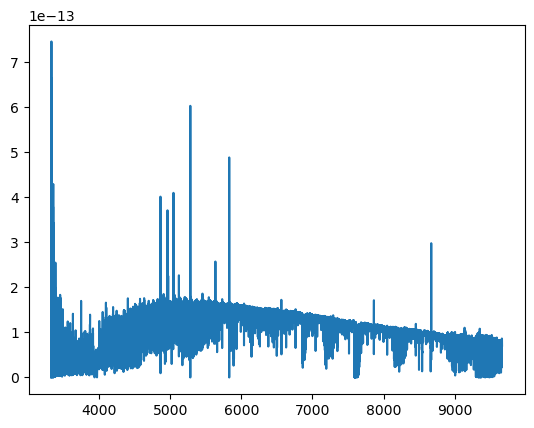

----------------
This graph is: hd269857_122722.fits and array 1
[0.000000e+00 0.000000e+00 0.000000e+00 ... 9.164395e-14 9.208172e-14
 9.241548e-14]
Spectrum1D (length=192788)
flux:             [ 0.0 erg / (A cm2 s), ..., 9.2415e-14 erg / (A cm2 s) ],  mean=1.829e-13 erg / (A cm2 s)
spectral axis:    [ 3323.7 Angstrom, ..., 9668.3 Angstrom ],  mean=6496.0 Angstrom


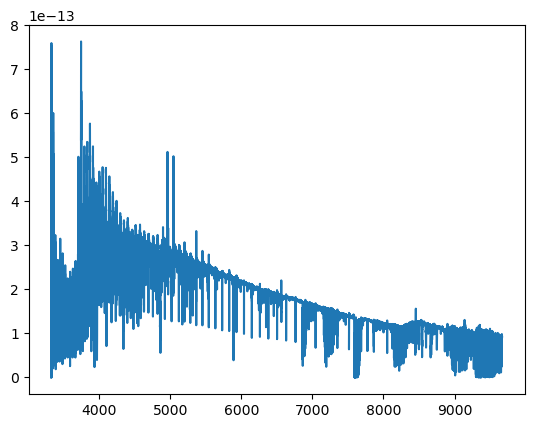

----------------
This graph is: hd27005_122722.fits and array 2
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.7671827e-14 4.8088954e-14
 4.8385954e-14]
Spectrum1D (length=192682)
flux:             [ 0.0 erg / (A cm2 s), ..., 4.8386e-14 erg / (A cm2 s) ],  mean=1.0345e-13 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9666.9 Angstrom ],  mean=6495.0 Angstrom


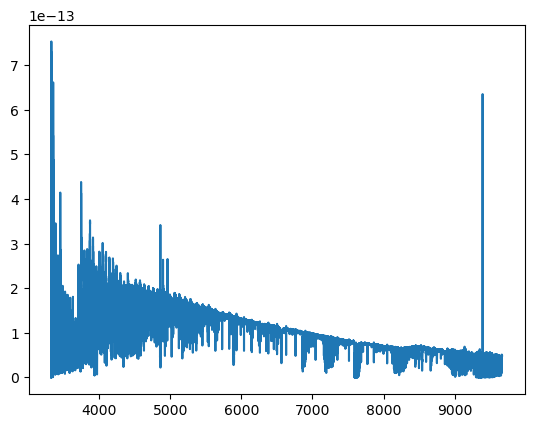

----------------
This graph is: hd269723_122722.fits and array 3
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.4722759e-13 2.4533766e-13
 2.4406060e-13]
Spectrum1D (length=192769)
flux:             [ 0.0 erg / (A cm2 s), ..., 2.4406e-13 erg / (A cm2 s) ],  mean=2.7851e-13 erg / (A cm2 s)
spectral axis:    [ 3322.9 Angstrom, ..., 9666.1 Angstrom ],  mean=6494.5 Angstrom


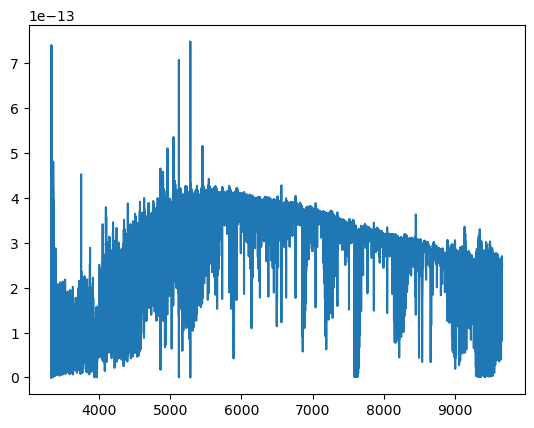

----------------
This graph is: hd269662_122622.fits and array 4
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.2449327e-14 3.2620658e-14
 3.2743390e-14]
Spectrum1D (length=192166)
flux:             [ 0.0 erg / (A cm2 s), ..., 3.2743e-14 erg / (A cm2 s) ],  mean=9.3983e-14 erg / (A cm2 s)
spectral axis:    [ 3322.1 Angstrom, ..., 9668.5 Angstrom ],  mean=6495.3 Angstrom


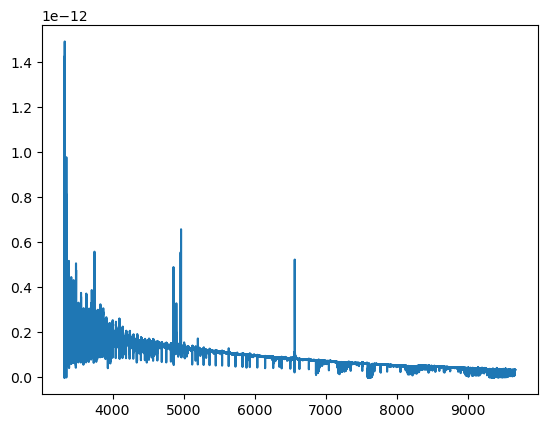

----------------
This graph is: hd269070_122622.fits and array 5
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.1817735e-14 7.1966738e-14
 7.2077903e-14]
Spectrum1D (length=192564)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.2078e-14 erg / (A cm2 s) ],  mean=1.0173e-13 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9668.5 Angstrom ],  mean=6495.8 Angstrom


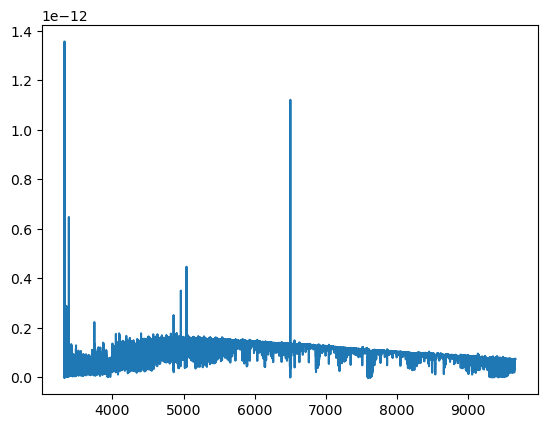

----------------
This graph is: sk_69_99_122622.fits and array 6
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0501220e-14 1.0465266e-14
 1.0437876e-14]
Spectrum1D (length=192491)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.0438e-14 erg / (A cm2 s) ],  mean=4.2241e-14 erg / (A cm2 s)
spectral axis:    [ 3323.1 Angstrom, ..., 9668.3 Angstrom ],  mean=6495.7 Angstrom


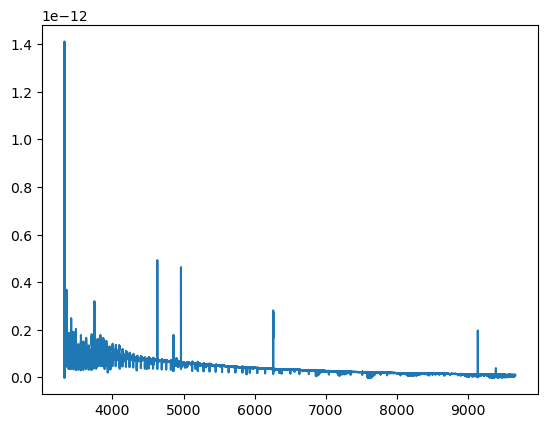

----------------
This graph is: hd269697_122722.fits and array 7
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.12180529e-13
 1.12222975e-13 1.12242159e-13]
Spectrum1D (length=192734)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.1224e-13 erg / (A cm2 s) ],  mean=2.2244e-13 erg / (A cm2 s)
spectral axis:    [ 3323.1 Angstrom, ..., 9666.9 Angstrom ],  mean=6495.0 Angstrom


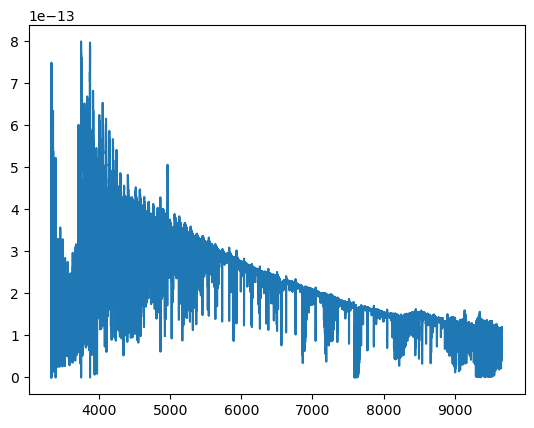

----------------
This graph is: hd269902_122722.fits and array 8
[0.000000e+00 0.000000e+00 0.000000e+00 ... 8.875468e-14 8.878556e-14
 8.879790e-14]
Spectrum1D (length=192749)
flux:             [ 0.0 erg / (A cm2 s), ..., 8.8798e-14 erg / (A cm2 s) ],  mean=1.9705e-13 erg / (A cm2 s)
spectral axis:    [ 3323.7 Angstrom, ..., 9668.2 Angstrom ],  mean=6495.9 Angstrom


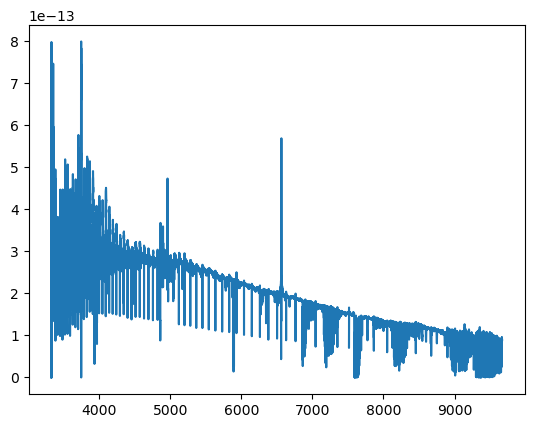

----------------
This graph is: w60_d17_122622.fits and array 9
[9.1347654e-13 0.0000000e+00 0.0000000e+00 ... 7.6088075e-14 7.6335470e-14
 7.6519317e-14]
Spectrum1D (length=192427)
flux:             [ 9.1348e-13 erg / (A cm2 s), ..., 7.6519e-14 erg / (A cm2 s) ],  mean=7.3338e-14 erg / (A cm2 s)
spectral axis:    [ 3322.2 Angstrom, ..., 9666.8 Angstrom ],  mean=6494.5 Angstrom


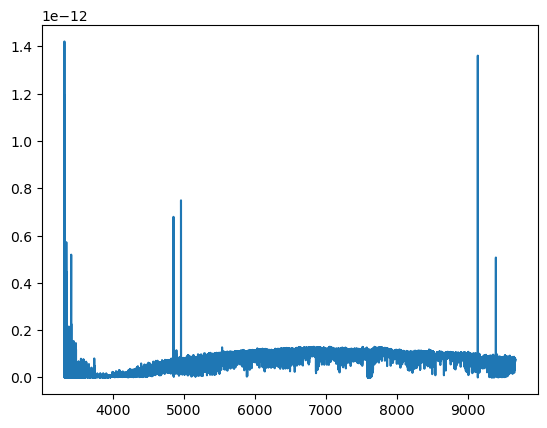

----------------
This graph is: hd269331_122622.fits and array 10
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.4539259e-14 7.2354537e-14
 7.0814285e-14]
Spectrum1D (length=192301)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.0814e-14 erg / (A cm2 s) ],  mean=1.9116e-13 erg / (A cm2 s)
spectral axis:    [ 3322.5 Angstrom, ..., 9668.5 Angstrom ],  mean=6495.5 Angstrom


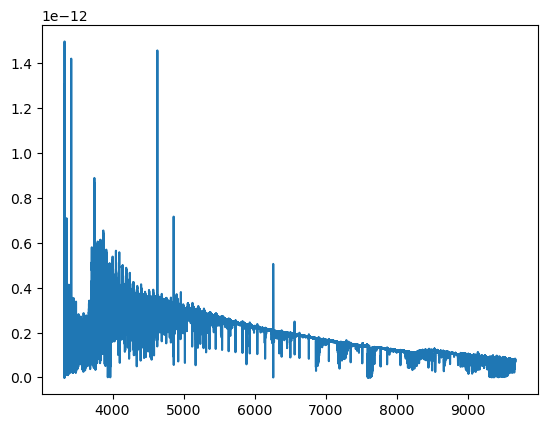

----------------
This graph is: hd269661_122622.fits and array 11
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.2468436e-14 3.2861040e-14
 3.3179422e-14]
Spectrum1D (length=192224)
flux:             [ 0.0 erg / (A cm2 s), ..., 3.3179e-14 erg / (A cm2 s) ],  mean=1.1616e-13 erg / (A cm2 s)
spectral axis:    [ 3322.0 Angstrom, ..., 9668.3 Angstrom ],  mean=6495.2 Angstrom


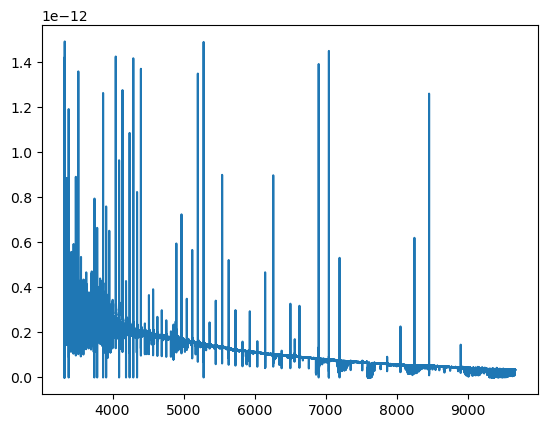

----------------
This graph is: hd268727_010323.fits and array 12
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.7629854e-14 1.7044192e-14
 1.6622263e-14]
Spectrum1D (length=192915)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.6622e-14 erg / (A cm2 s) ],  mean=5.5852e-14 erg / (A cm2 s)
spectral axis:    [ 3323.4 Angstrom, ..., 9666.7 Angstrom ],  mean=6495.1 Angstrom


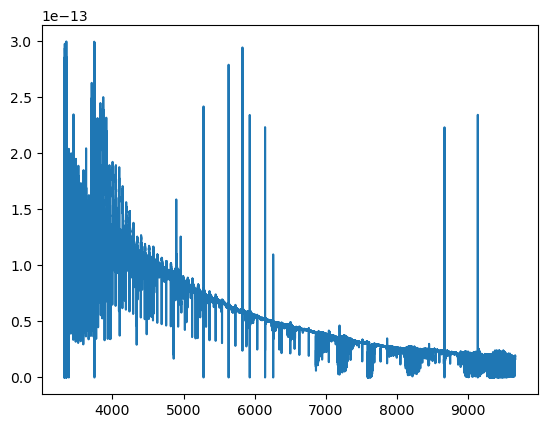

----------------
This graph is: hd269762_122722.fits and array 13
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.6681758e-14 4.6908132e-14
 4.7079155e-14]
Spectrum1D (length=192786)
flux:             [ 0.0 erg / (A cm2 s), ..., 4.7079e-14 erg / (A cm2 s) ],  mean=1.7245e-13 erg / (A cm2 s)
spectral axis:    [ 3323.3 Angstrom, ..., 9667.5 Angstrom ],  mean=6495.4 Angstrom


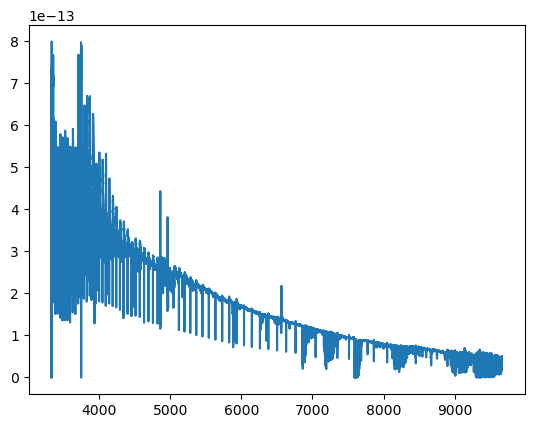

----------------
This graph is: hd269953_122722.fits and array 14
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.4244268e-13 1.4062913e-13
 1.3934113e-13]
Spectrum1D (length=192701)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.3934e-13 erg / (A cm2 s) ],  mean=2.2562e-13 erg / (A cm2 s)
spectral axis:    [ 3323.8 Angstrom, ..., 9668.9 Angstrom ],  mean=6496.4 Angstrom


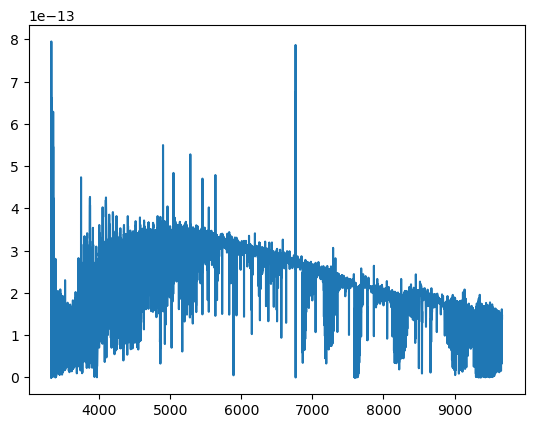

----------------
This graph is: hd33579_122622.fits and array 15
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.7440037e-13 1.7455837e-13
 1.7469159e-13]
Spectrum1D (length=192492)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.7469e-13 erg / (A cm2 s) ],  mean=5.1948e-13 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9668.6 Angstrom ],  mean=6495.9 Angstrom


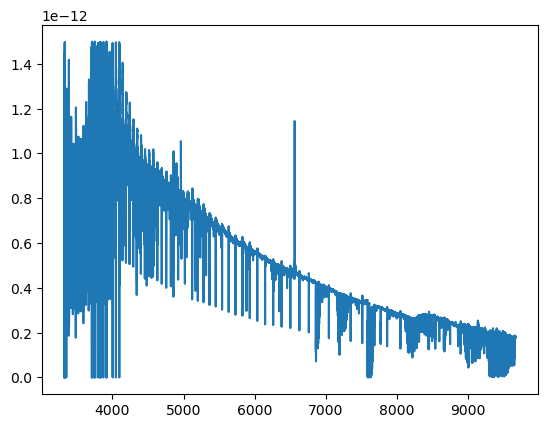

----------------
This graph is: hv2450_122622.fits and array 16
[0.000000e+00 0.000000e+00 0.000000e+00 ... 8.074119e-14 7.933356e-14
 7.845860e-14]
Spectrum1D (length=192226)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.8459e-14 erg / (A cm2 s) ],  mean=4.6086e-14 erg / (A cm2 s)
spectral axis:    [ 3321.8 Angstrom, ..., 9667.6 Angstrom ],  mean=6494.7 Angstrom


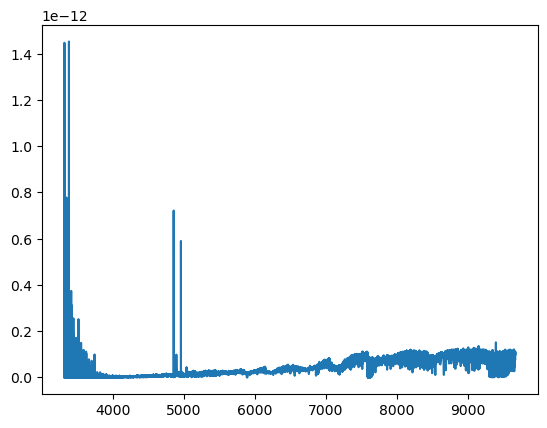

----------------
This graph is: hv883_010323.fits and array 17
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.6294041e-14 2.5897263e-14
 2.5615252e-14]
Spectrum1D (length=192789)
flux:             [ 0.0 erg / (A cm2 s), ..., 2.5615e-14 erg / (A cm2 s) ],  mean=2.2354e-14 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9667.3 Angstrom ],  mean=6495.3 Angstrom


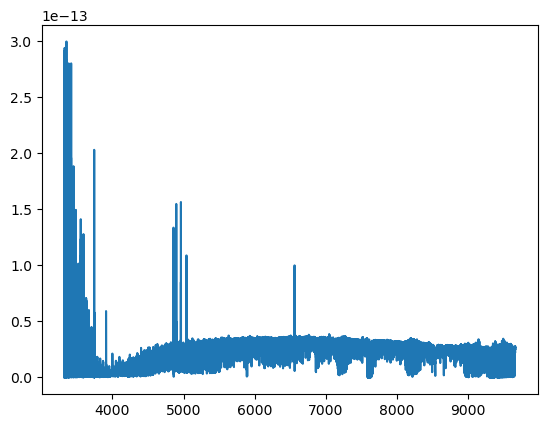

----------------
This graph is: hd269604_122622.fits and array 18
[0.000000e+00 0.000000e+00 0.000000e+00 ... 3.032549e-14 2.935594e-14
 2.865009e-14]
Spectrum1D (length=192272)
flux:             [ 0.0 erg / (A cm2 s), ..., 2.865e-14 erg / (A cm2 s) ],  mean=9.8601e-14 erg / (A cm2 s)
spectral axis:    [ 3322.2 Angstrom, ..., 9668.2 Angstrom ],  mean=6495.2 Angstrom


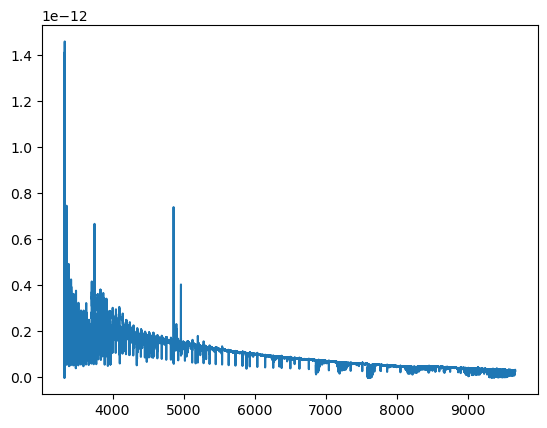

----------------
This graph is: hd268819_122622.fits and array 19
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.12427083e-13
 1.11847712e-13 1.11425544e-13]
Spectrum1D (length=192682)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.1143e-13 erg / (A cm2 s) ],  mean=2.2637e-13 erg / (A cm2 s)
spectral axis:    [ 3323.8 Angstrom, ..., 9668.8 Angstrom ],  mean=6496.3 Angstrom


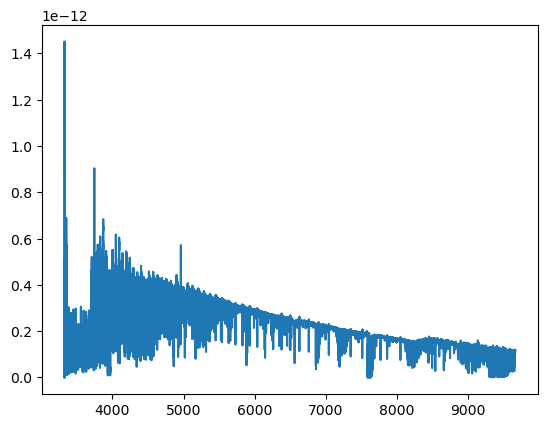

----------------
This graph is: j05344_122722.fits and array 20
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.3717877e-14 6.3812914e-14
 6.3889452e-14]
Spectrum1D (length=192899)
flux:             [ 0.0 erg / (A cm2 s), ..., 6.3889e-14 erg / (A cm2 s) ],  mean=5.2784e-14 erg / (A cm2 s)
spectral axis:    [ 3323.7 Angstrom, ..., 9666.8 Angstrom ],  mean=6495.2 Angstrom


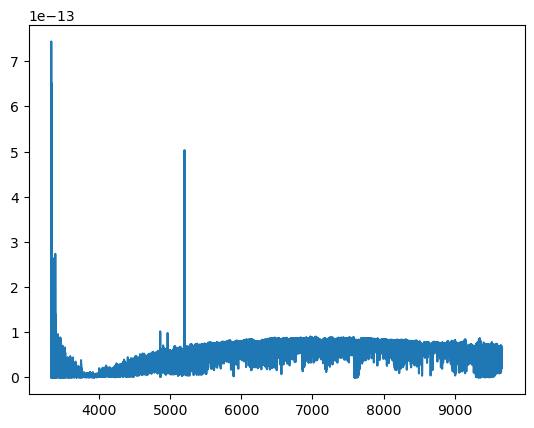

----------------
This graph is: cd_69_310_122622.fits and array 21
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.3274995e-14 4.3502067e-14
 4.3672588e-14]
Spectrum1D (length=192489)
flux:             [ 0.0 erg / (A cm2 s), ..., 4.3673e-14 erg / (A cm2 s) ],  mean=1.0092e-13 erg / (A cm2 s)
spectral axis:    [ 3322.9 Angstrom, ..., 9668.4 Angstrom ],  mean=6495.7 Angstrom


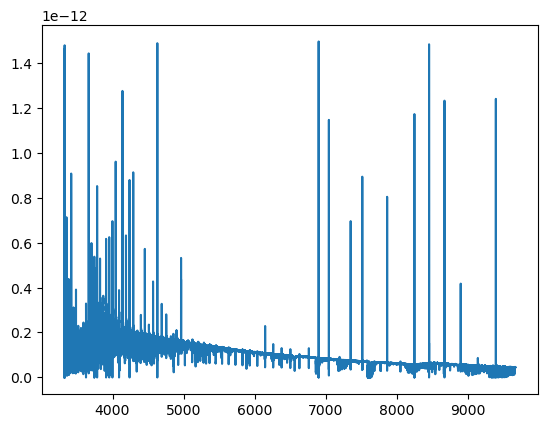

----------------
This graph is: sp77_31_16_122622.fits and array 22
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.7176158e-13 1.7136046e-13
 1.7108399e-13]
Spectrum1D (length=192682)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.7108e-13 erg / (A cm2 s) ],  mean=1.3103e-13 erg / (A cm2 s)
spectral axis:    [ 3323.8 Angstrom, ..., 9668.8 Angstrom ],  mean=6496.3 Angstrom


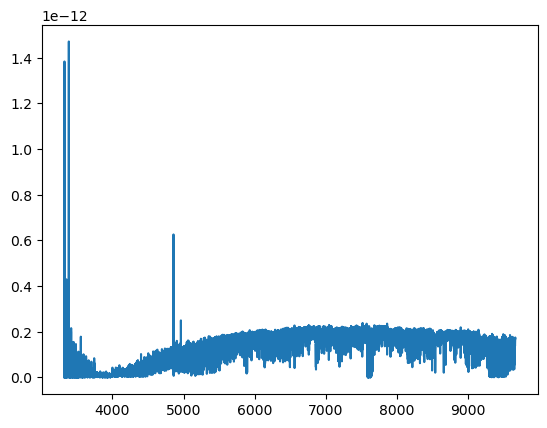

----------------
This graph is: cpd-69-496_122722.fits and array 23
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.2043680e-14 5.1586980e-14
 5.1264833e-14]
Spectrum1D (length=192556)
flux:             [ 0.0 erg / (A cm2 s), ..., 5.1265e-14 erg / (A cm2 s) ],  mean=8.3304e-14 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9668.8 Angstrom ],  mean=6496.0 Angstrom


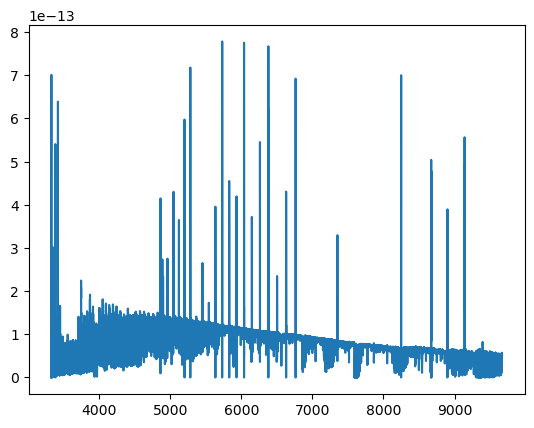

----------------
This graph is: hd268687_122622.fits and array 24
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.0974283e-14 6.0578218e-14
 6.0283294e-14]
Spectrum1D (length=192666)
flux:             [ 0.0 erg / (A cm2 s), ..., 6.0283e-14 erg / (A cm2 s) ],  mean=1.1449e-13 erg / (A cm2 s)
spectral axis:    [ 3323.7 Angstrom, ..., 9668.8 Angstrom ],  mean=6496.3 Angstrom


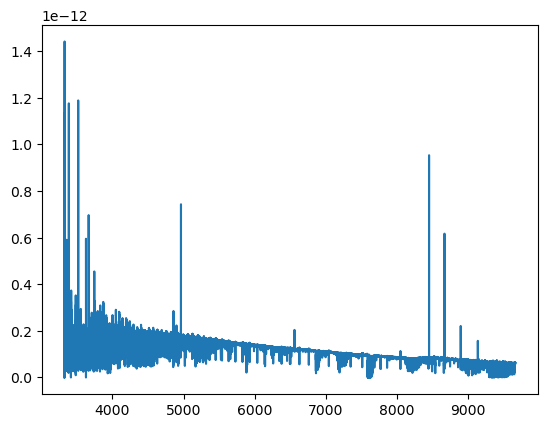

----------------
This graph is: sp77_48_6_122622.fits and array 25
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.6662285e-14 8.6372390e-14
 8.6217010e-14]
Spectrum1D (length=192341)
flux:             [ 0.0 erg / (A cm2 s), ..., 8.6217e-14 erg / (A cm2 s) ],  mean=6.2195e-14 erg / (A cm2 s)
spectral axis:    [ 3322.7 Angstrom, ..., 9669.1 Angstrom ],  mean=6495.9 Angstrom


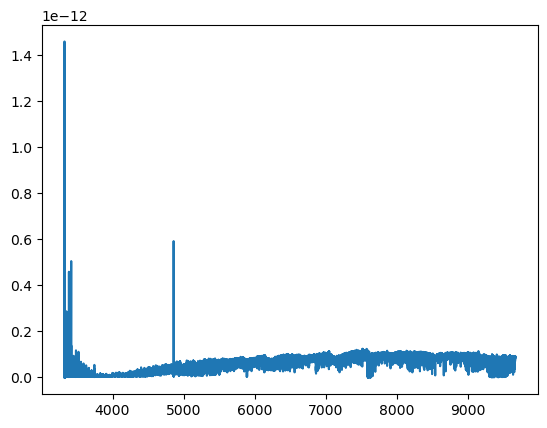

----------------
This graph is: hd268828_010323.fits and array 26
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.1596152e-14 3.1435199e-14
 3.1324695e-14]
Spectrum1D (length=193166)
flux:             [ 0.0 erg / (A cm2 s), ..., 3.1325e-14 erg / (A cm2 s) ],  mean=3.9852e-14 erg / (A cm2 s)
spectral axis:    [ 3325.0 Angstrom, ..., 9668.7 Angstrom ],  mean=6496.9 Angstrom


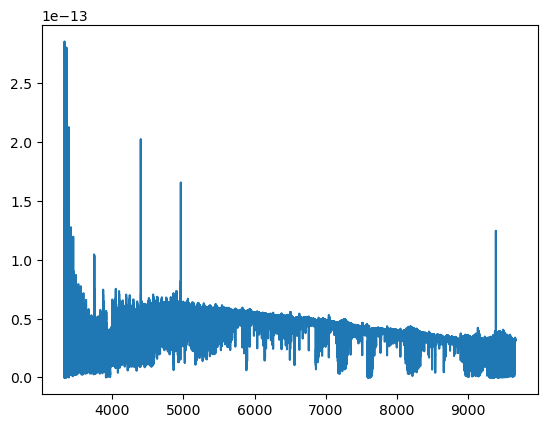

----------------
This graph is: hd269651_122622.fits and array 27
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.5919357e-14 2.6044738e-14
 2.6144876e-14]
Spectrum1D (length=192392)
flux:             [ 0.0 erg / (A cm2 s), ..., 2.6145e-14 erg / (A cm2 s) ],  mean=7.4752e-14 erg / (A cm2 s)
spectral axis:    [ 3322.6 Angstrom, ..., 9668.4 Angstrom ],  mean=6495.5 Angstrom


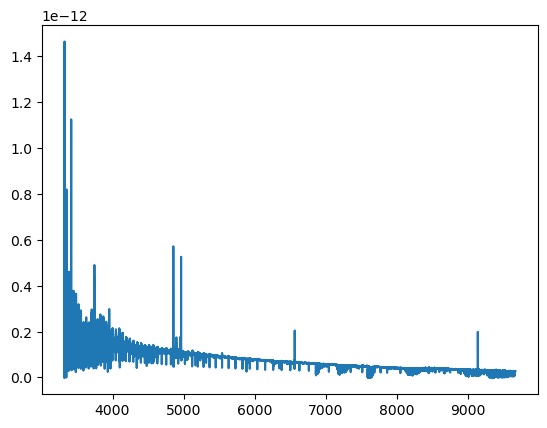

----------------
This graph is: hd269982_122722.fits and array 28
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.0767892e-14 6.1030276e-14
 6.1225832e-14]
Spectrum1D (length=192960)
flux:             [ 0.0 erg / (A cm2 s), ..., 6.1226e-14 erg / (A cm2 s) ],  mean=1.285e-13 erg / (A cm2 s)
spectral axis:    [ 3324.4 Angstrom, ..., 9668.6 Angstrom ],  mean=6496.5 Angstrom


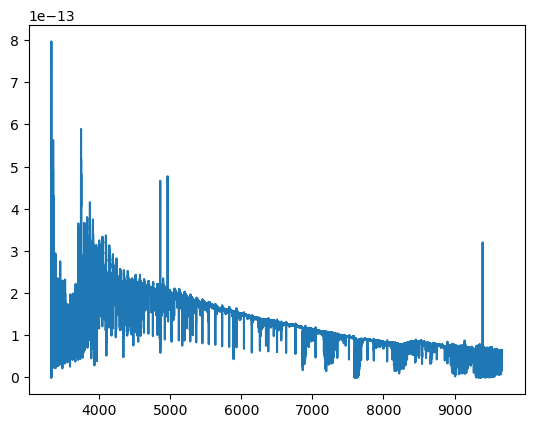

----------------
This graph is: sk_69_148_122622.fits and array 29
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.3818732e-14 7.3229718e-14
 7.2789546e-14]
Spectrum1D (length=192561)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.279e-14 erg / (A cm2 s) ],  mean=8.1735e-14 erg / (A cm2 s)
spectral axis:    [ 3323.1 Angstrom, ..., 9668.0 Angstrom ],  mean=6495.6 Angstrom


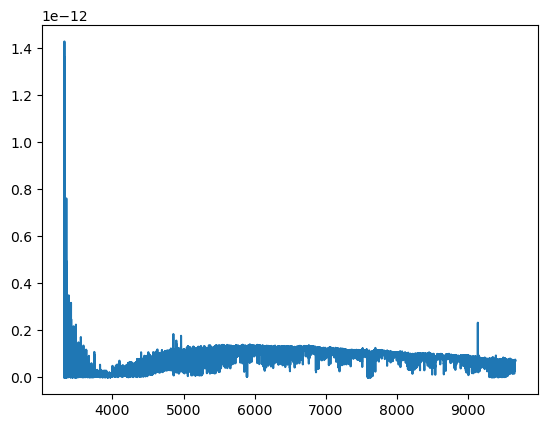

----------------
This graph is: hd268949_010323.fits and array 30
[0.000000e+00 0.000000e+00 0.000000e+00 ... 8.701250e-15 8.342869e-15
 8.094669e-15]
Spectrum1D (length=192691)
flux:             [ 0.0 erg / (A cm2 s), ..., 8.0947e-15 erg / (A cm2 s) ],  mean=3.2044e-14 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9668.6 Angstrom ],  mean=6495.9 Angstrom


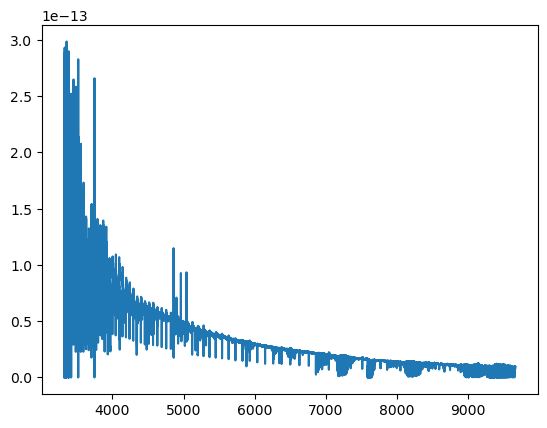

----------------
This graph is: hd268946_122622.fits and array 31
[0.000000e+00 0.000000e+00 0.000000e+00 ... 5.743614e-14 5.788091e-14
 5.820490e-14]
Spectrum1D (length=192551)
flux:             [ 0.0 erg / (A cm2 s), ..., 5.8205e-14 erg / (A cm2 s) ],  mean=2.1416e-13 erg / (A cm2 s)
spectral axis:    [ 3322.7 Angstrom, ..., 9666.8 Angstrom ],  mean=6494.8 Angstrom


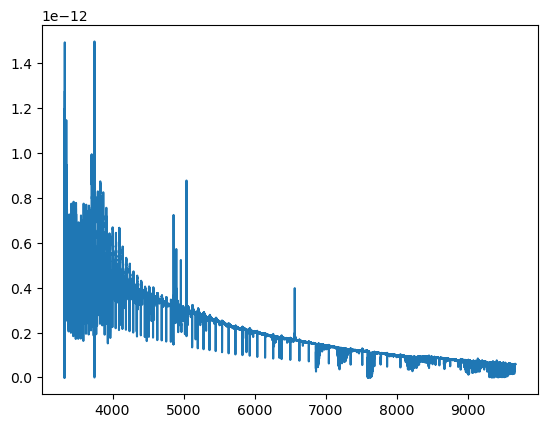

----------------
This graph is: hd269840_122722.fits and array 32
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.6524778e-14 9.7689170e-14
 9.8606826e-14]
Spectrum1D (length=193164)
flux:             [ 0.0 erg / (A cm2 s), ..., 9.8607e-14 erg / (A cm2 s) ],  mean=1.7566e-13 erg / (A cm2 s)
spectral axis:    [ 3324.5 Angstrom, ..., 9667.4 Angstrom ],  mean=6495.9 Angstrom


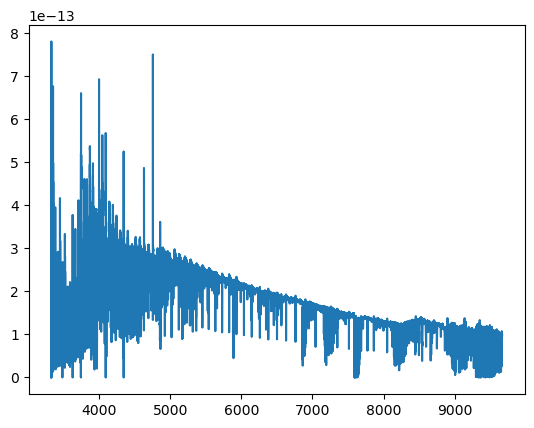

----------------
This graph is: rm177_010323.fits and array 33
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.5986327e-14 5.5804496e-14
 5.5713114e-14]
Spectrum1D (length=192909)
flux:             [ 0.0 erg / (A cm2 s), ..., 5.5713e-14 erg / (A cm2 s) ],  mean=3.8631e-14 erg / (A cm2 s)
spectral axis:    [ 3327.0 Angstrom, ..., 9676.9 Angstrom ],  mean=6501.9 Angstrom


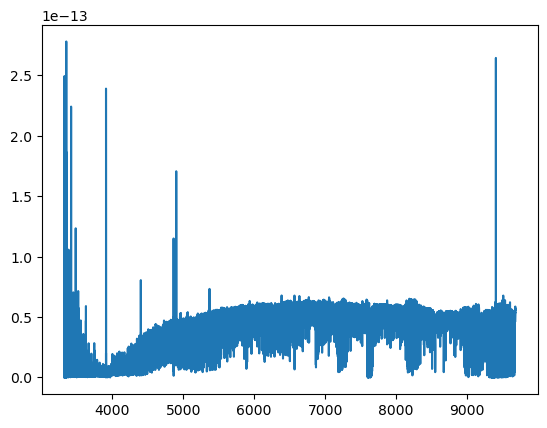

----------------
This graph is: hd269110_122622.fits and array 34
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.3271535e-14 7.3446057e-14
 7.3587803e-14]
Spectrum1D (length=192564)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.3588e-14 erg / (A cm2 s) ],  mean=1.0597e-13 erg / (A cm2 s)
spectral axis:    [ 3323.4 Angstrom, ..., 9669.2 Angstrom ],  mean=6496.3 Angstrom


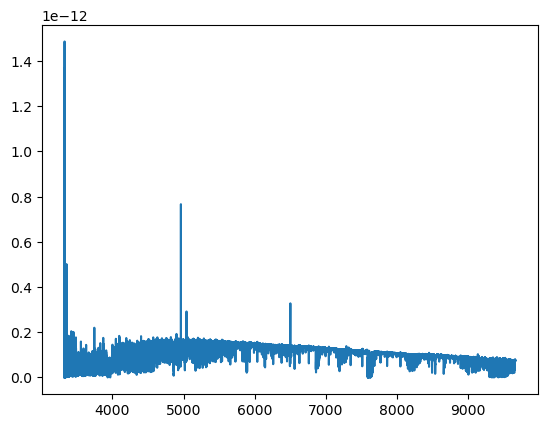

----------------
This graph is: hd269787_122722.fits and array 35
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.0643680e-14 4.1232832e-14
 4.1657382e-14]
Spectrum1D (length=192841)
flux:             [ 0.0 erg / (A cm2 s), ..., 4.1657e-14 erg / (A cm2 s) ],  mean=1.3724e-13 erg / (A cm2 s)
spectral axis:    [ 3323.3 Angstrom, ..., 9666.4 Angstrom ],  mean=6494.9 Angstrom


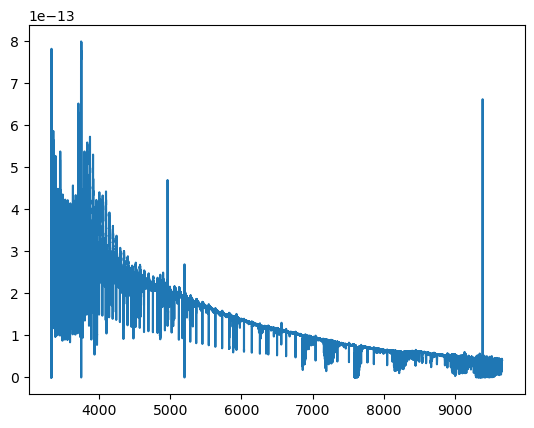

----------------
This graph is: hd269807_122722.fits and array 36
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.6811578e-14 3.7402322e-14
 3.7840194e-14]
Spectrum1D (length=192747)
flux:             [ 0.0 erg / (A cm2 s), ..., 3.784e-14 erg / (A cm2 s) ],  mean=1.0048e-13 erg / (A cm2 s)
spectral axis:    [ 3323.0 Angstrom, ..., 9666.8 Angstrom ],  mean=6494.9 Angstrom


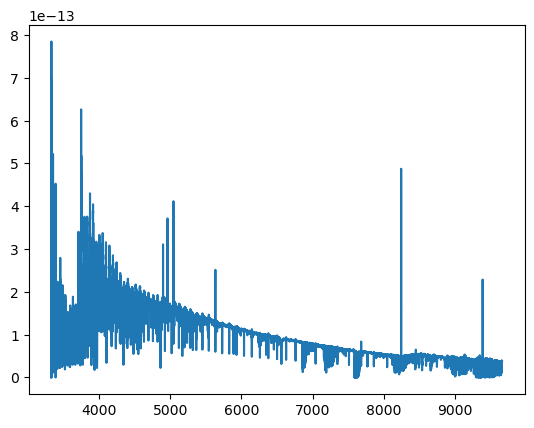

----------------
This graph is: out.fits and array 37
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.5986327e-14 5.5804496e-14
 5.5713114e-14]
Spectrum1D (length=192909)
flux:             [ 0.0 erg / (A cm2 s), ..., 5.5713e-14 erg / (A cm2 s) ],  mean=3.8631e-14 erg / (A cm2 s)
spectral axis:    [ 3327.0 Angstrom, ..., 9676.9 Angstrom ],  mean=6501.9 Angstrom


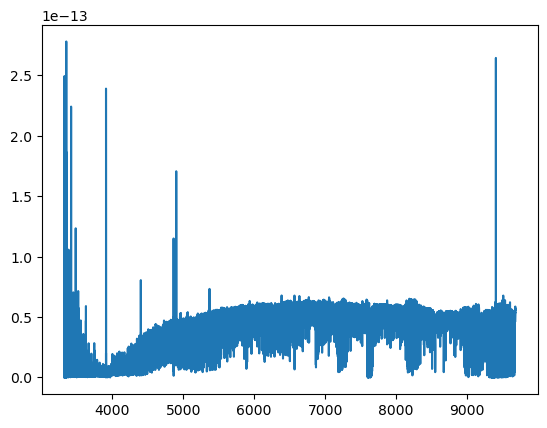

----------------
This graph is: hd268971_122622.fits and array 38
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.5710891e-14 1.5738579e-14
 1.5753034e-14]
Spectrum1D (length=192503)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.5753e-14 erg / (A cm2 s) ],  mean=6.6343e-14 erg / (A cm2 s)
spectral axis:    [ 3323.3 Angstrom, ..., 9669.0 Angstrom ],  mean=6496.2 Angstrom


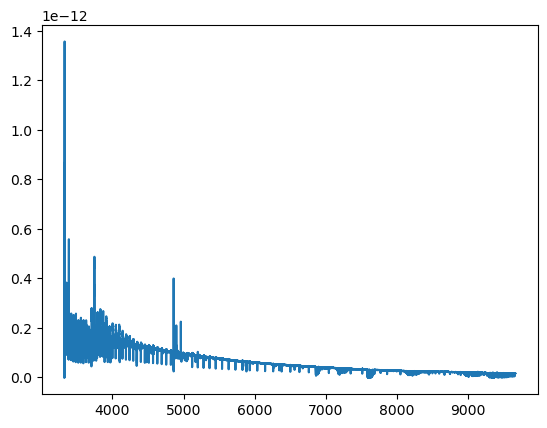

In [159]:
# plot every file
for i in range(39):
    graph(i)

# The H-alpha line
Now we can zoom into these graphs and look at specific parts of it. We are looking for "warm" outflows (∼5-10 thousand K), which are tracable in the Hα line. The Hα line appears at 6562.8 Å when a hydrogen electron moves between the second (n=2) and third atomic energy level (n=3). This line is significant because it is the strongest H line in the optical, and it indicates the presence of hydrogen. Since most stellar envelopes are predominantly composed of hydrogen, the Hα in emission is a key to understanding the environment surrounding an observed star. 

In [19]:
# zoom in on h-alpha line
def graph1(i):
    """
    This takes an integer value i and 
    outputs the graph corresponding to that number in the list from the data.zip file,
    with a wavelength between 6500 and 6600.
    """
    
    # open the fits file
    hdulist = fits.open(str(files[i]))
    hdr = getheader(files[i])
    
    # read the fits file with specutils
    spec1d = Spectrum1D.read("/Users/kchen/FYPS/"+ files[i])
    filename = '/Users/kchen/FYPS/' + files[i]
    
    # The spectrum is in the first HDU of this file.
    with fits.open(filename) as f:  
        specdata = f[0].data
    
    # clearly divide and label each spectrum
    text = colored('----------------\nThis graph is: ' + files[i] + ' and array ' + str(i), 'red', attrs=['bold'])  
    print(text)  
    print(specdata)
    print(spec1d)
    
    # plot with higher resolution
    ax = plt.subplots(dpi=300)[1] 
    ax.plot(spec1d.spectral_axis, spec1d.flux)
    
    # zooming into h-alpha line
    ax.set_xlim((6500, 6600))
    
    # label axes
    ax.set_xlabel('Wavelength [Å]')
    ax.set_ylabel('Flux [erg/s/cm^2/Å]')
    
    # plot
    plt.show()


----------------
This graph is: hd269857_122722.fits and array 1
[0.000000e+00 0.000000e+00 0.000000e+00 ... 9.164395e-14 9.208172e-14
 9.241548e-14]
Spectrum1D (length=192788)
flux:             [ 0.0 erg / (A cm2 s), ..., 9.2415e-14 erg / (A cm2 s) ],  mean=1.829e-13 erg / (A cm2 s)
spectral axis:    [ 3323.7 Angstrom, ..., 9668.3 Angstrom ],  mean=6496.0 Angstrom


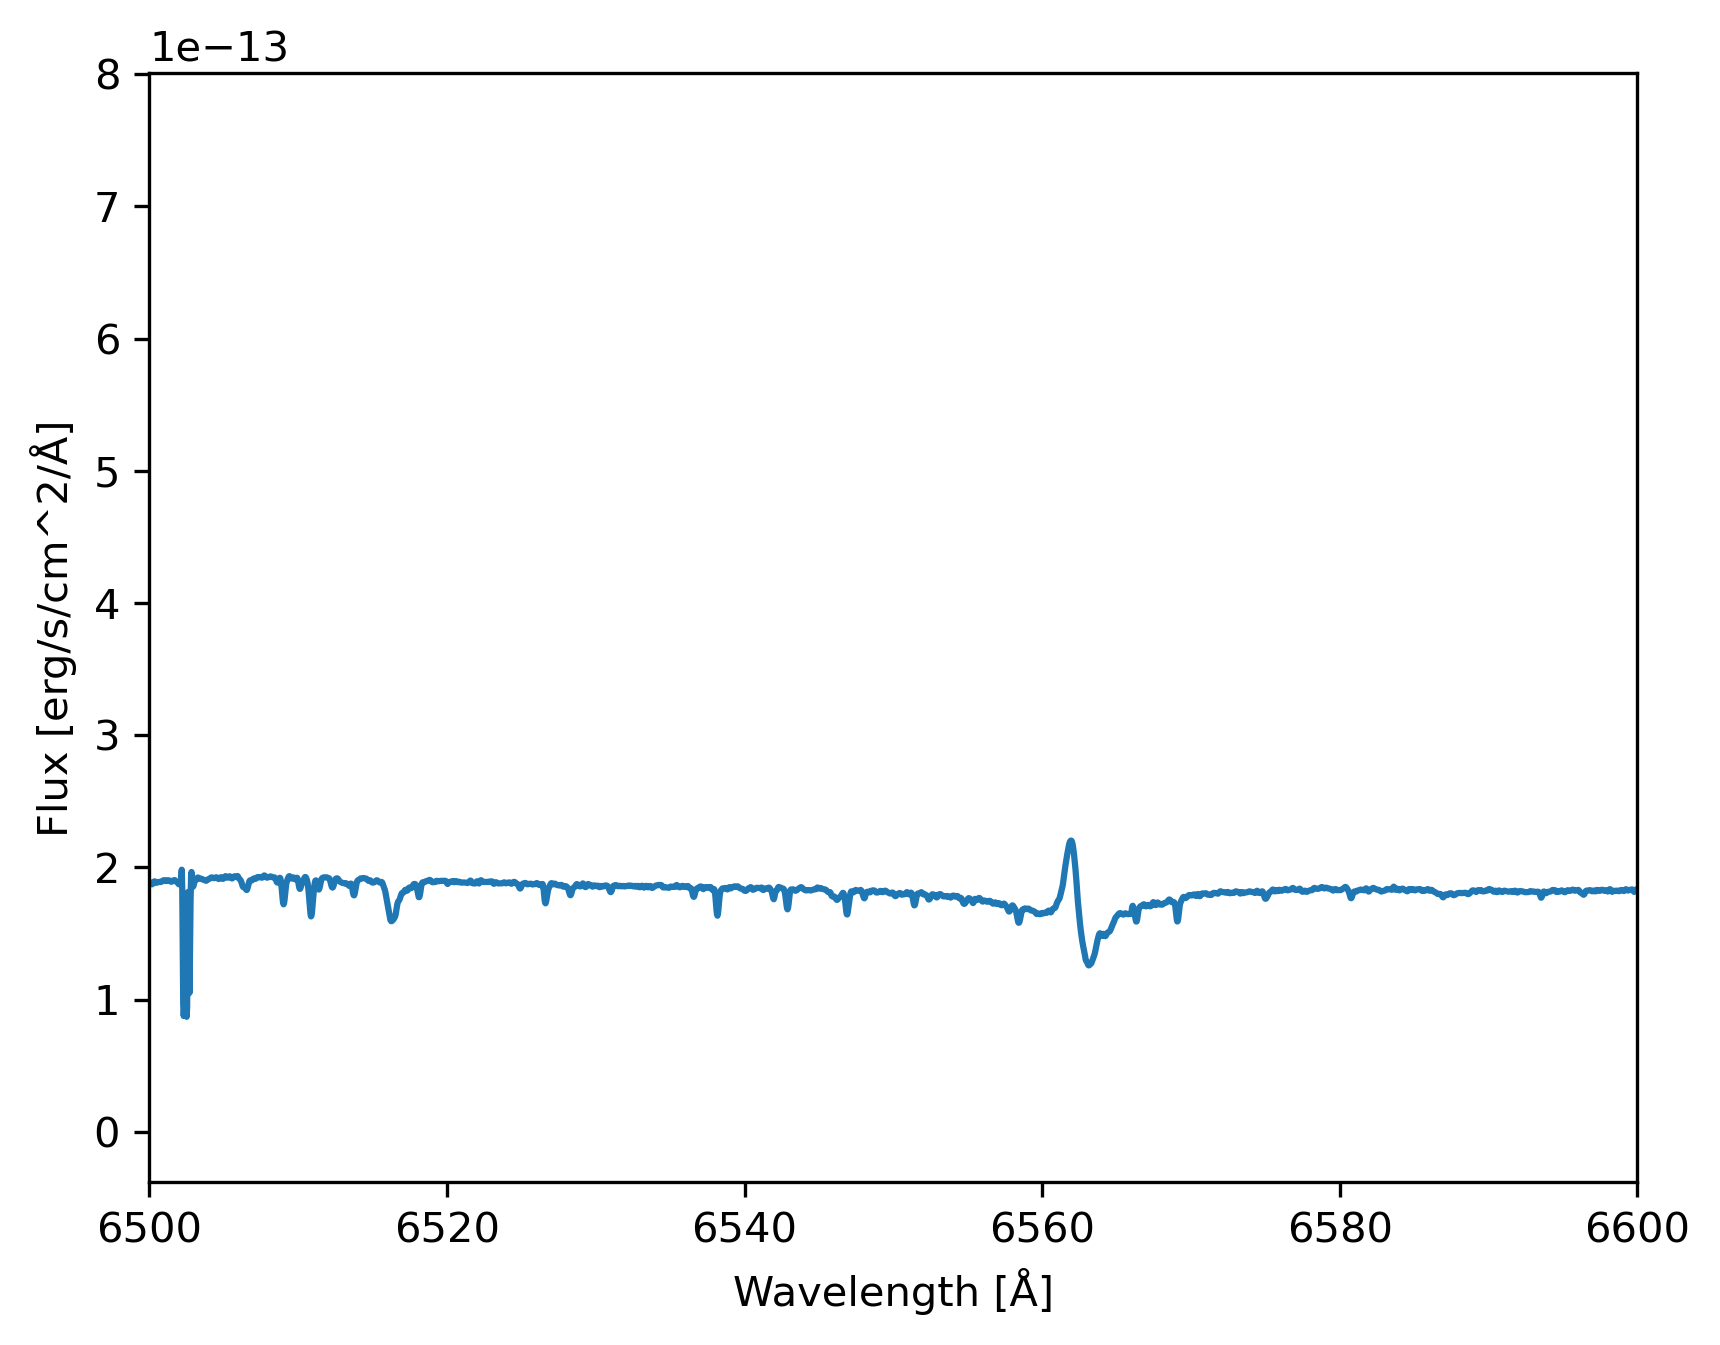

In [20]:
# check if it works
graph1(1)

----------------
This graph is: hd269879_122722.fits and array 0
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.6016511e-14 7.2936686e-14
 7.0703419e-14]
Spectrum1D (length=192664)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.0703e-14 erg / (A cm2 s) ],  mean=1.0521e-13 erg / (A cm2 s)
spectral axis:    [ 3322.9 Angstrom, ..., 9667.2 Angstrom ],  mean=6495.0 Angstrom


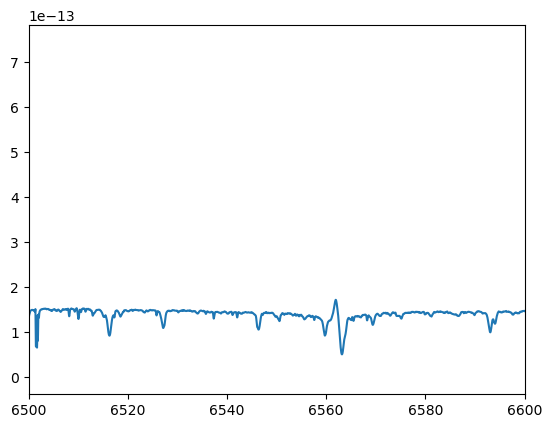

----------------
This graph is: hd269857_122722.fits and array 1
[0.000000e+00 0.000000e+00 0.000000e+00 ... 9.164395e-14 9.208172e-14
 9.241548e-14]
Spectrum1D (length=192788)
flux:             [ 0.0 erg / (A cm2 s), ..., 9.2415e-14 erg / (A cm2 s) ],  mean=1.829e-13 erg / (A cm2 s)
spectral axis:    [ 3323.7 Angstrom, ..., 9668.3 Angstrom ],  mean=6496.0 Angstrom


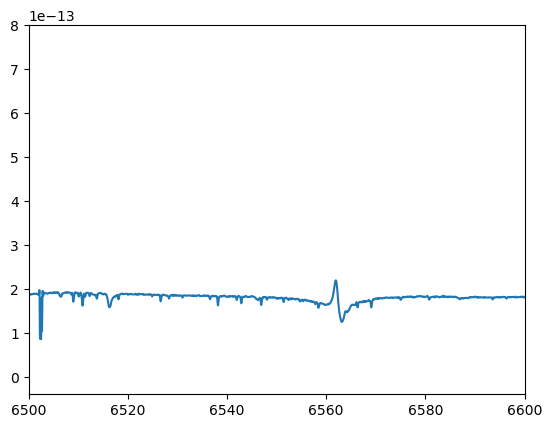

----------------
This graph is: hd27005_122722.fits and array 2
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.7671827e-14 4.8088954e-14
 4.8385954e-14]
Spectrum1D (length=192682)
flux:             [ 0.0 erg / (A cm2 s), ..., 4.8386e-14 erg / (A cm2 s) ],  mean=1.0345e-13 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9666.9 Angstrom ],  mean=6495.0 Angstrom


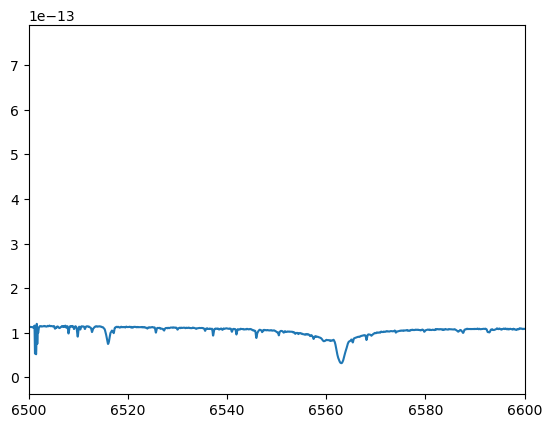

----------------
This graph is: hd269723_122722.fits and array 3
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.4722759e-13 2.4533766e-13
 2.4406060e-13]
Spectrum1D (length=192769)
flux:             [ 0.0 erg / (A cm2 s), ..., 2.4406e-13 erg / (A cm2 s) ],  mean=2.7851e-13 erg / (A cm2 s)
spectral axis:    [ 3322.9 Angstrom, ..., 9666.1 Angstrom ],  mean=6494.5 Angstrom


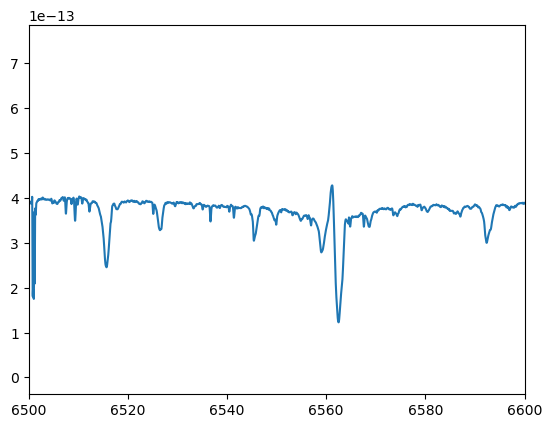

----------------
This graph is: hd269662_122622.fits and array 4
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.2449327e-14 3.2620658e-14
 3.2743390e-14]
Spectrum1D (length=192166)
flux:             [ 0.0 erg / (A cm2 s), ..., 3.2743e-14 erg / (A cm2 s) ],  mean=9.3983e-14 erg / (A cm2 s)
spectral axis:    [ 3322.1 Angstrom, ..., 9668.5 Angstrom ],  mean=6495.3 Angstrom


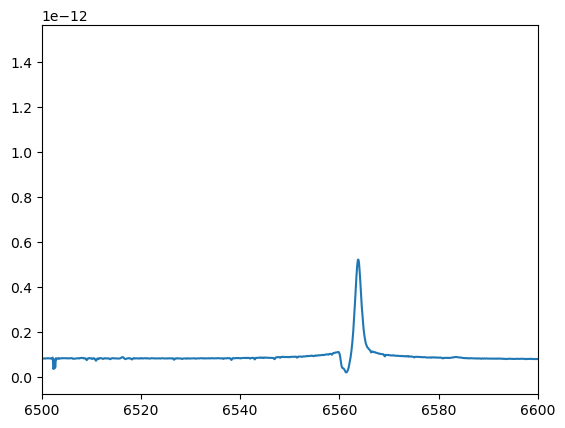

----------------
This graph is: hd269070_122622.fits and array 5
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.1817735e-14 7.1966738e-14
 7.2077903e-14]
Spectrum1D (length=192564)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.2078e-14 erg / (A cm2 s) ],  mean=1.0173e-13 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9668.5 Angstrom ],  mean=6495.8 Angstrom


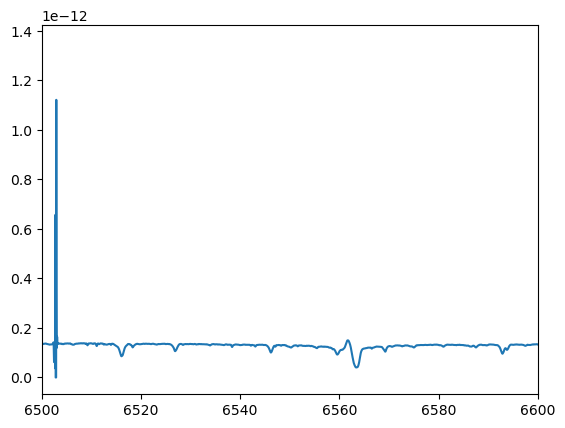

----------------
This graph is: sk_69_99_122622.fits and array 6
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0501220e-14 1.0465266e-14
 1.0437876e-14]
Spectrum1D (length=192491)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.0438e-14 erg / (A cm2 s) ],  mean=4.2241e-14 erg / (A cm2 s)
spectral axis:    [ 3323.1 Angstrom, ..., 9668.3 Angstrom ],  mean=6495.7 Angstrom


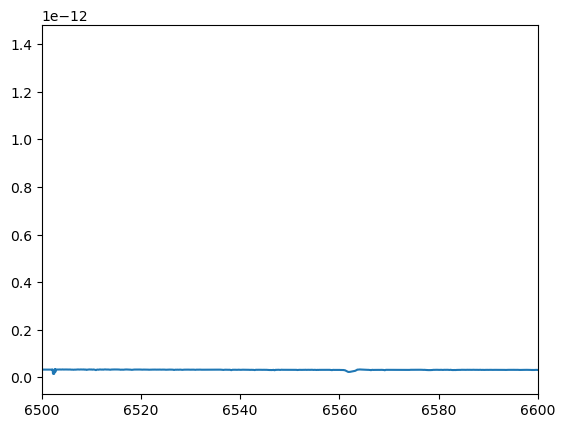

----------------
This graph is: hd269697_122722.fits and array 7
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.12180529e-13
 1.12222975e-13 1.12242159e-13]
Spectrum1D (length=192734)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.1224e-13 erg / (A cm2 s) ],  mean=2.2244e-13 erg / (A cm2 s)
spectral axis:    [ 3323.1 Angstrom, ..., 9666.9 Angstrom ],  mean=6495.0 Angstrom


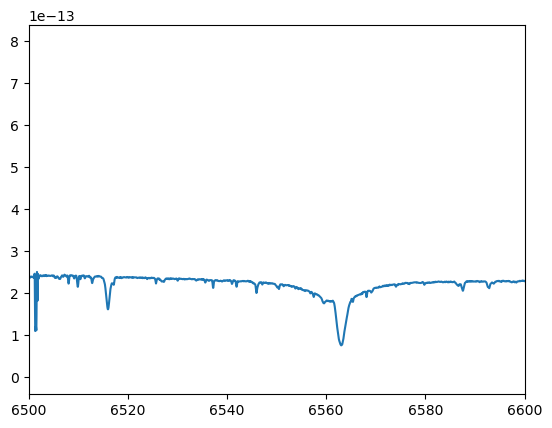

----------------
This graph is: hd269902_122722.fits and array 8
[0.000000e+00 0.000000e+00 0.000000e+00 ... 8.875468e-14 8.878556e-14
 8.879790e-14]
Spectrum1D (length=192749)
flux:             [ 0.0 erg / (A cm2 s), ..., 8.8798e-14 erg / (A cm2 s) ],  mean=1.9705e-13 erg / (A cm2 s)
spectral axis:    [ 3323.7 Angstrom, ..., 9668.2 Angstrom ],  mean=6495.9 Angstrom


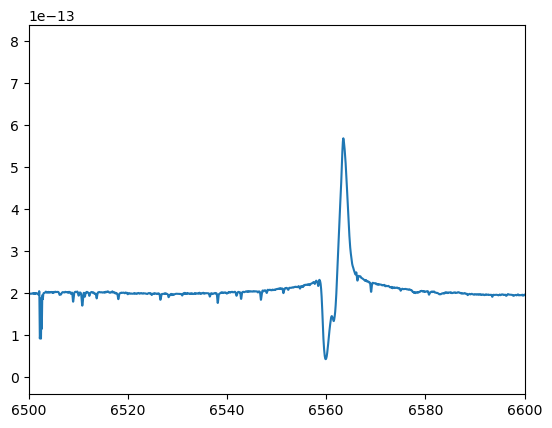

----------------
This graph is: w60_d17_122622.fits and array 9
[9.1347654e-13 0.0000000e+00 0.0000000e+00 ... 7.6088075e-14 7.6335470e-14
 7.6519317e-14]
Spectrum1D (length=192427)
flux:             [ 9.1348e-13 erg / (A cm2 s), ..., 7.6519e-14 erg / (A cm2 s) ],  mean=7.3338e-14 erg / (A cm2 s)
spectral axis:    [ 3322.2 Angstrom, ..., 9666.8 Angstrom ],  mean=6494.5 Angstrom


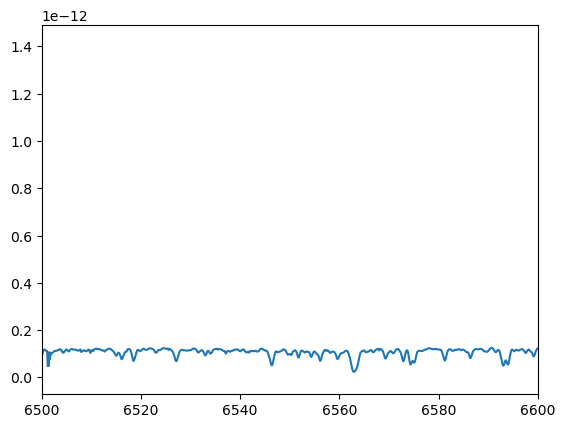

----------------
This graph is: hd269331_122622.fits and array 10
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.4539259e-14 7.2354537e-14
 7.0814285e-14]
Spectrum1D (length=192301)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.0814e-14 erg / (A cm2 s) ],  mean=1.9116e-13 erg / (A cm2 s)
spectral axis:    [ 3322.5 Angstrom, ..., 9668.5 Angstrom ],  mean=6495.5 Angstrom


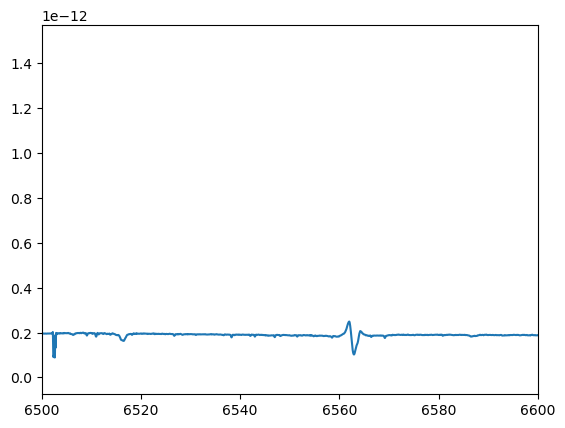

----------------
This graph is: hd269661_122622.fits and array 11
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.2468436e-14 3.2861040e-14
 3.3179422e-14]
Spectrum1D (length=192224)
flux:             [ 0.0 erg / (A cm2 s), ..., 3.3179e-14 erg / (A cm2 s) ],  mean=1.1616e-13 erg / (A cm2 s)
spectral axis:    [ 3322.0 Angstrom, ..., 9668.3 Angstrom ],  mean=6495.2 Angstrom


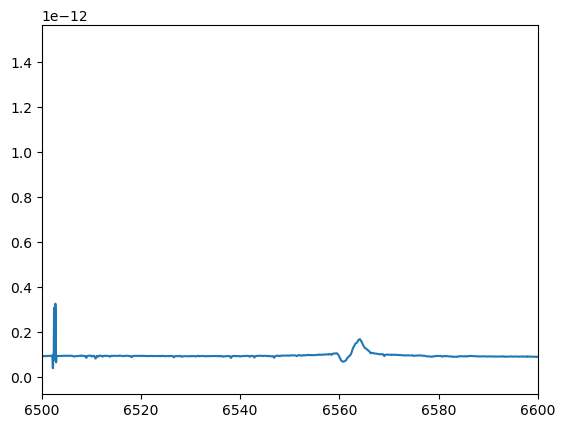

----------------
This graph is: hd268727_010323.fits and array 12
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.7629854e-14 1.7044192e-14
 1.6622263e-14]
Spectrum1D (length=192915)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.6622e-14 erg / (A cm2 s) ],  mean=5.5852e-14 erg / (A cm2 s)
spectral axis:    [ 3323.4 Angstrom, ..., 9666.7 Angstrom ],  mean=6495.1 Angstrom


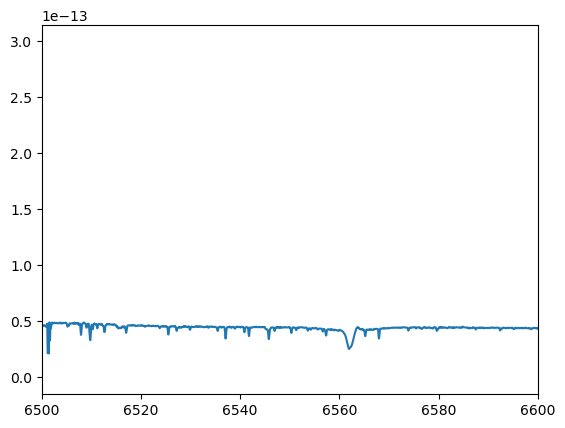

----------------
This graph is: hd269762_122722.fits and array 13
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.6681758e-14 4.6908132e-14
 4.7079155e-14]
Spectrum1D (length=192786)
flux:             [ 0.0 erg / (A cm2 s), ..., 4.7079e-14 erg / (A cm2 s) ],  mean=1.7245e-13 erg / (A cm2 s)
spectral axis:    [ 3323.3 Angstrom, ..., 9667.5 Angstrom ],  mean=6495.4 Angstrom


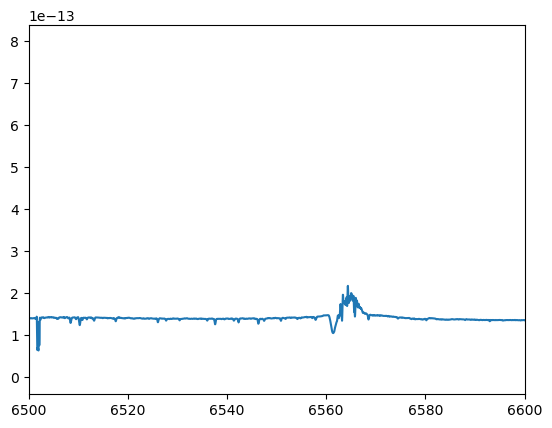

----------------
This graph is: hd269953_122722.fits and array 14
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.4244268e-13 1.4062913e-13
 1.3934113e-13]
Spectrum1D (length=192701)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.3934e-13 erg / (A cm2 s) ],  mean=2.2562e-13 erg / (A cm2 s)
spectral axis:    [ 3323.8 Angstrom, ..., 9668.9 Angstrom ],  mean=6496.4 Angstrom


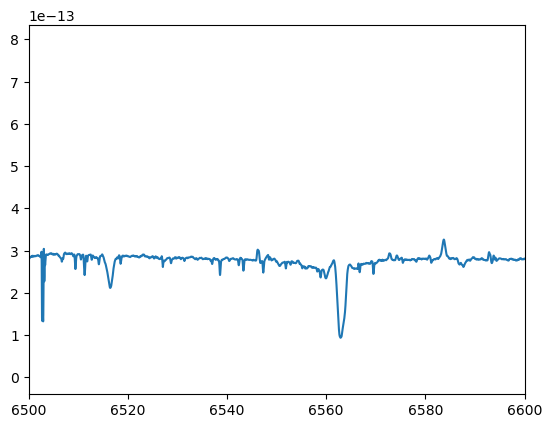

----------------
This graph is: hd33579_122622.fits and array 15
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.7440037e-13 1.7455837e-13
 1.7469159e-13]
Spectrum1D (length=192492)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.7469e-13 erg / (A cm2 s) ],  mean=5.1948e-13 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9668.6 Angstrom ],  mean=6495.9 Angstrom


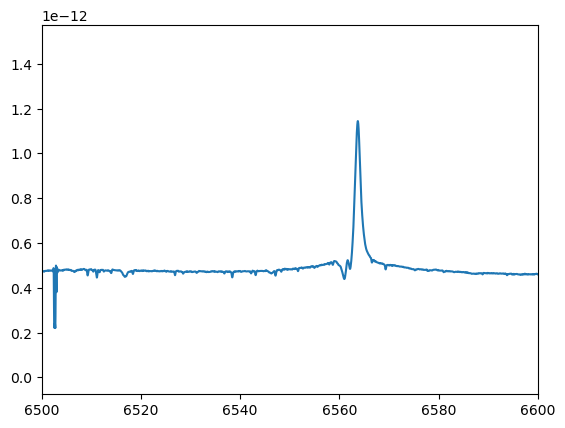

----------------
This graph is: hv2450_122622.fits and array 16
[0.000000e+00 0.000000e+00 0.000000e+00 ... 8.074119e-14 7.933356e-14
 7.845860e-14]
Spectrum1D (length=192226)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.8459e-14 erg / (A cm2 s) ],  mean=4.6086e-14 erg / (A cm2 s)
spectral axis:    [ 3321.8 Angstrom, ..., 9667.6 Angstrom ],  mean=6494.7 Angstrom


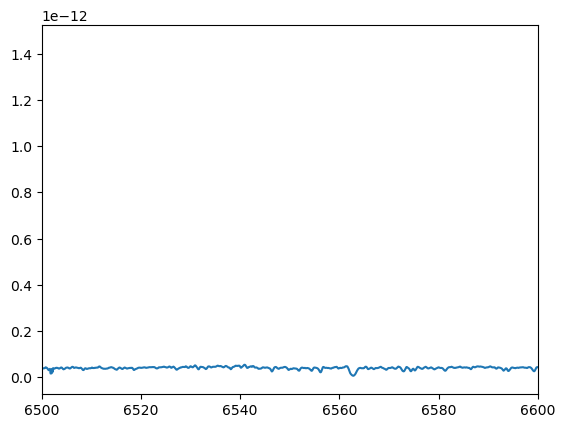

----------------
This graph is: hv883_010323.fits and array 17
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.6294041e-14 2.5897263e-14
 2.5615252e-14]
Spectrum1D (length=192789)
flux:             [ 0.0 erg / (A cm2 s), ..., 2.5615e-14 erg / (A cm2 s) ],  mean=2.2354e-14 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9667.3 Angstrom ],  mean=6495.3 Angstrom


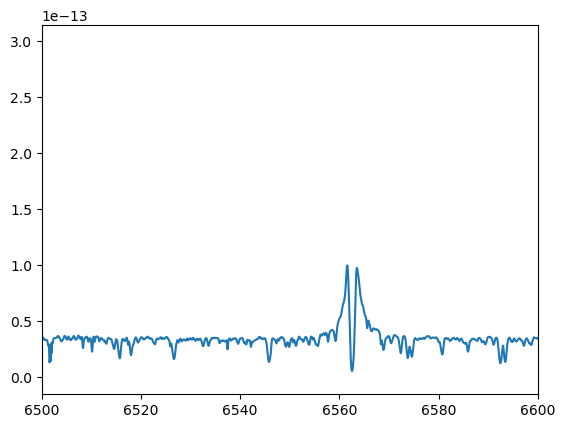

----------------
This graph is: hd269604_122622.fits and array 18
[0.000000e+00 0.000000e+00 0.000000e+00 ... 3.032549e-14 2.935594e-14
 2.865009e-14]
Spectrum1D (length=192272)
flux:             [ 0.0 erg / (A cm2 s), ..., 2.865e-14 erg / (A cm2 s) ],  mean=9.8601e-14 erg / (A cm2 s)
spectral axis:    [ 3322.2 Angstrom, ..., 9668.2 Angstrom ],  mean=6495.2 Angstrom


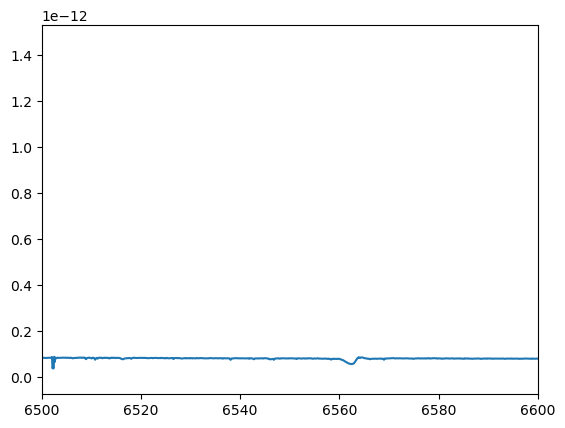

----------------
This graph is: hd268819_122622.fits and array 19
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.12427083e-13
 1.11847712e-13 1.11425544e-13]
Spectrum1D (length=192682)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.1143e-13 erg / (A cm2 s) ],  mean=2.2637e-13 erg / (A cm2 s)
spectral axis:    [ 3323.8 Angstrom, ..., 9668.8 Angstrom ],  mean=6496.3 Angstrom


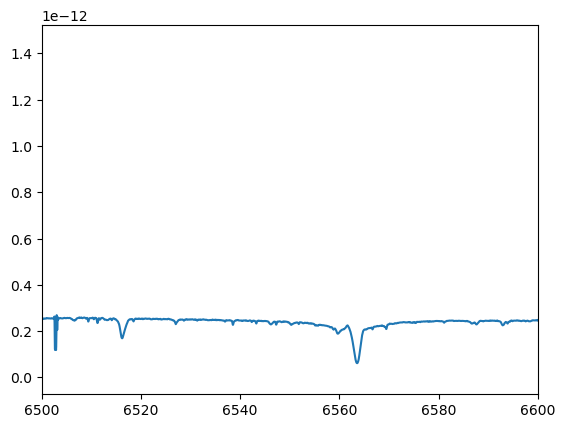

----------------
This graph is: j05344_122722.fits and array 20
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.3717877e-14 6.3812914e-14
 6.3889452e-14]
Spectrum1D (length=192899)
flux:             [ 0.0 erg / (A cm2 s), ..., 6.3889e-14 erg / (A cm2 s) ],  mean=5.2784e-14 erg / (A cm2 s)
spectral axis:    [ 3323.7 Angstrom, ..., 9666.8 Angstrom ],  mean=6495.2 Angstrom


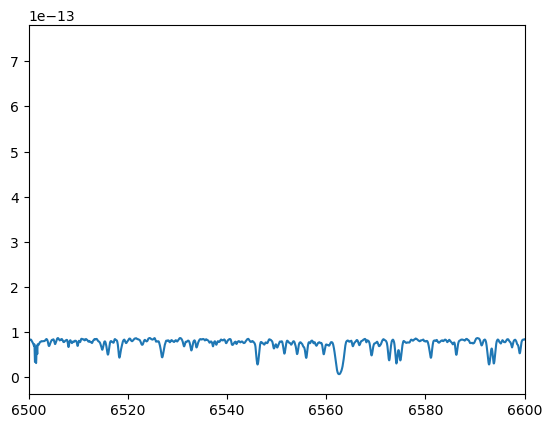

----------------
This graph is: cd_69_310_122622.fits and array 21
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.3274995e-14 4.3502067e-14
 4.3672588e-14]
Spectrum1D (length=192489)
flux:             [ 0.0 erg / (A cm2 s), ..., 4.3673e-14 erg / (A cm2 s) ],  mean=1.0092e-13 erg / (A cm2 s)
spectral axis:    [ 3322.9 Angstrom, ..., 9668.4 Angstrom ],  mean=6495.7 Angstrom


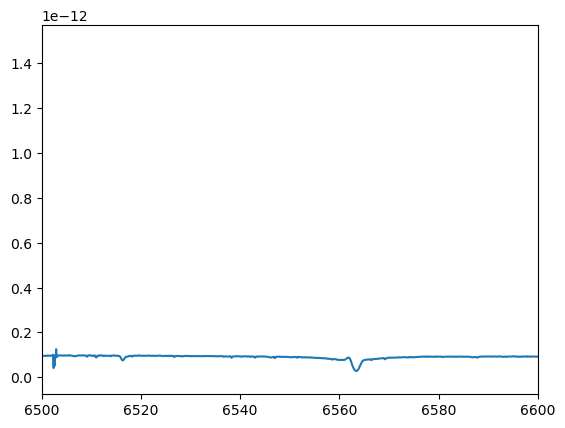

----------------
This graph is: sp77_31_16_122622.fits and array 22
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.7176158e-13 1.7136046e-13
 1.7108399e-13]
Spectrum1D (length=192682)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.7108e-13 erg / (A cm2 s) ],  mean=1.3103e-13 erg / (A cm2 s)
spectral axis:    [ 3323.8 Angstrom, ..., 9668.8 Angstrom ],  mean=6496.3 Angstrom


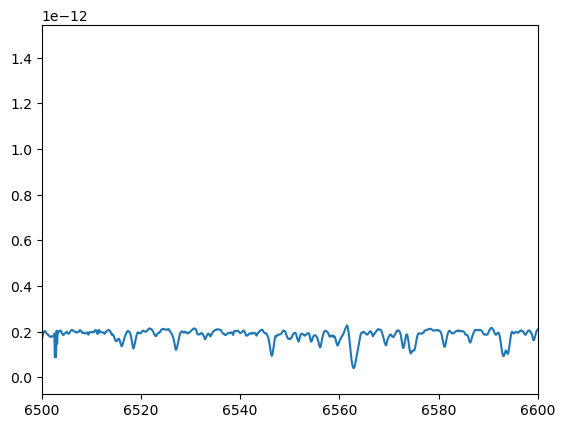

----------------
This graph is: cpd-69-496_122722.fits and array 23
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.2043680e-14 5.1586980e-14
 5.1264833e-14]
Spectrum1D (length=192556)
flux:             [ 0.0 erg / (A cm2 s), ..., 5.1265e-14 erg / (A cm2 s) ],  mean=8.3304e-14 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9668.8 Angstrom ],  mean=6496.0 Angstrom


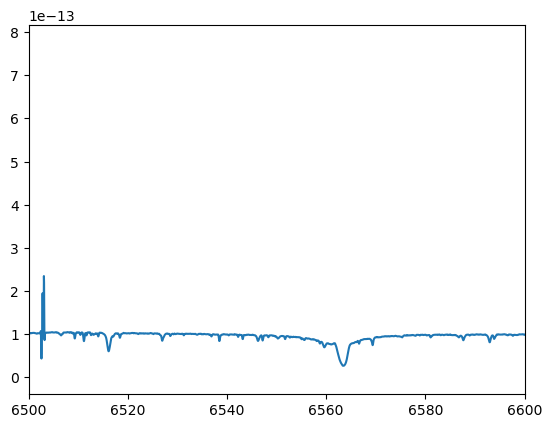

----------------
This graph is: hd268687_122622.fits and array 24
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.0974283e-14 6.0578218e-14
 6.0283294e-14]
Spectrum1D (length=192666)
flux:             [ 0.0 erg / (A cm2 s), ..., 6.0283e-14 erg / (A cm2 s) ],  mean=1.1449e-13 erg / (A cm2 s)
spectral axis:    [ 3323.7 Angstrom, ..., 9668.8 Angstrom ],  mean=6496.3 Angstrom


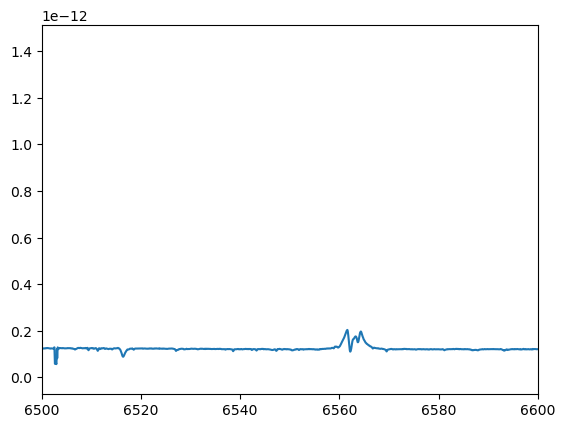

----------------
This graph is: sp77_48_6_122622.fits and array 25
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.6662285e-14 8.6372390e-14
 8.6217010e-14]
Spectrum1D (length=192341)
flux:             [ 0.0 erg / (A cm2 s), ..., 8.6217e-14 erg / (A cm2 s) ],  mean=6.2195e-14 erg / (A cm2 s)
spectral axis:    [ 3322.7 Angstrom, ..., 9669.1 Angstrom ],  mean=6495.9 Angstrom


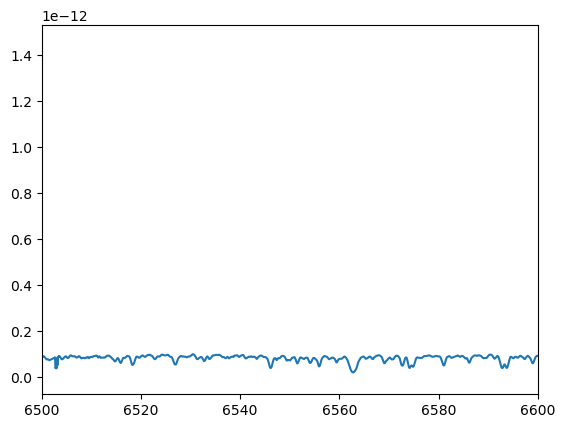

----------------
This graph is: hd268828_010323.fits and array 26
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.1596152e-14 3.1435199e-14
 3.1324695e-14]
Spectrum1D (length=193166)
flux:             [ 0.0 erg / (A cm2 s), ..., 3.1325e-14 erg / (A cm2 s) ],  mean=3.9852e-14 erg / (A cm2 s)
spectral axis:    [ 3325.0 Angstrom, ..., 9668.7 Angstrom ],  mean=6496.9 Angstrom


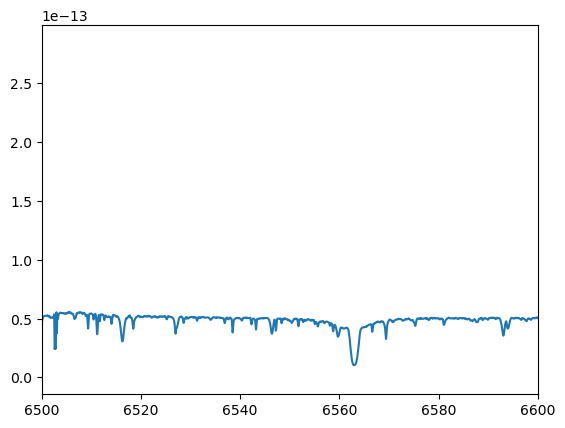

----------------
This graph is: hd269651_122622.fits and array 27
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.5919357e-14 2.6044738e-14
 2.6144876e-14]
Spectrum1D (length=192392)
flux:             [ 0.0 erg / (A cm2 s), ..., 2.6145e-14 erg / (A cm2 s) ],  mean=7.4752e-14 erg / (A cm2 s)
spectral axis:    [ 3322.6 Angstrom, ..., 9668.4 Angstrom ],  mean=6495.5 Angstrom


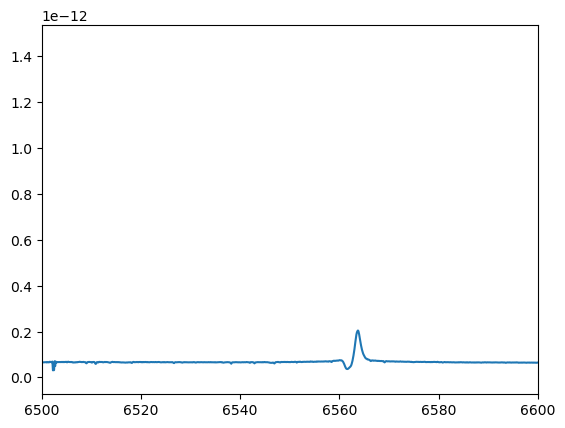

----------------
This graph is: hd269982_122722.fits and array 28
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.0767892e-14 6.1030276e-14
 6.1225832e-14]
Spectrum1D (length=192960)
flux:             [ 0.0 erg / (A cm2 s), ..., 6.1226e-14 erg / (A cm2 s) ],  mean=1.285e-13 erg / (A cm2 s)
spectral axis:    [ 3324.4 Angstrom, ..., 9668.6 Angstrom ],  mean=6496.5 Angstrom


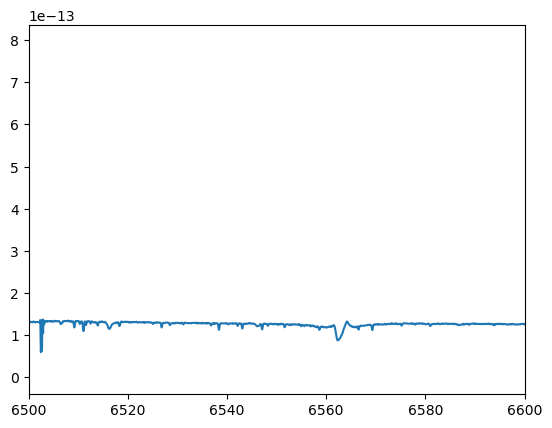

----------------
This graph is: sk_69_148_122622.fits and array 29
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.3818732e-14 7.3229718e-14
 7.2789546e-14]
Spectrum1D (length=192561)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.279e-14 erg / (A cm2 s) ],  mean=8.1735e-14 erg / (A cm2 s)
spectral axis:    [ 3323.1 Angstrom, ..., 9668.0 Angstrom ],  mean=6495.6 Angstrom


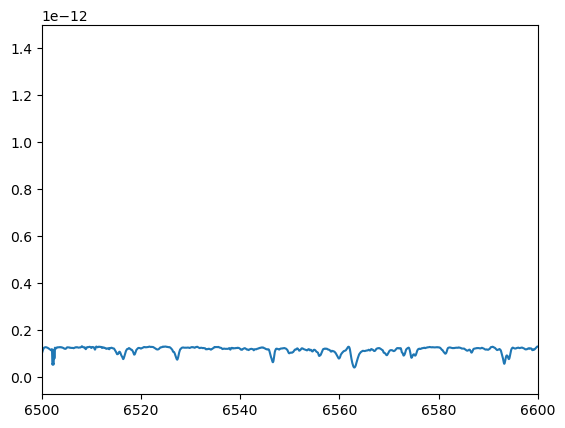

----------------
This graph is: hd268949_010323.fits and array 30
[0.000000e+00 0.000000e+00 0.000000e+00 ... 8.701250e-15 8.342869e-15
 8.094669e-15]
Spectrum1D (length=192691)
flux:             [ 0.0 erg / (A cm2 s), ..., 8.0947e-15 erg / (A cm2 s) ],  mean=3.2044e-14 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9668.6 Angstrom ],  mean=6495.9 Angstrom


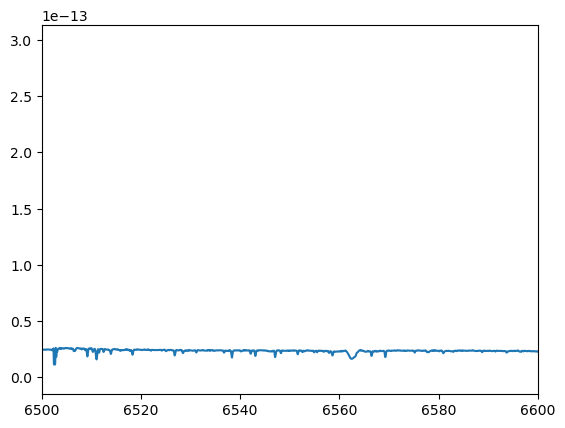

----------------
This graph is: hd268946_122622.fits and array 31
[0.000000e+00 0.000000e+00 0.000000e+00 ... 5.743614e-14 5.788091e-14
 5.820490e-14]
Spectrum1D (length=192551)
flux:             [ 0.0 erg / (A cm2 s), ..., 5.8205e-14 erg / (A cm2 s) ],  mean=2.1416e-13 erg / (A cm2 s)
spectral axis:    [ 3322.7 Angstrom, ..., 9666.8 Angstrom ],  mean=6494.8 Angstrom


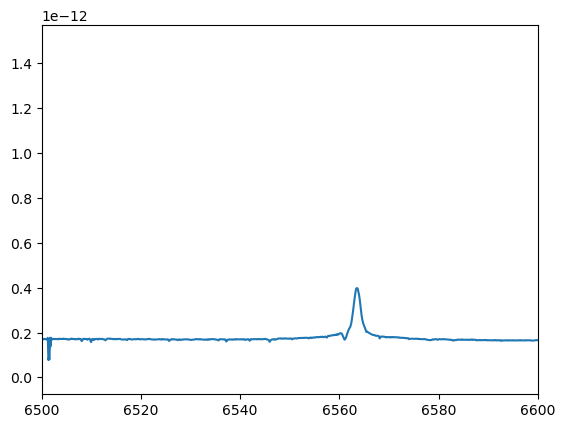

----------------
This graph is: hd269840_122722.fits and array 32
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.6524778e-14 9.7689170e-14
 9.8606826e-14]
Spectrum1D (length=193164)
flux:             [ 0.0 erg / (A cm2 s), ..., 9.8607e-14 erg / (A cm2 s) ],  mean=1.7566e-13 erg / (A cm2 s)
spectral axis:    [ 3324.5 Angstrom, ..., 9667.4 Angstrom ],  mean=6495.9 Angstrom


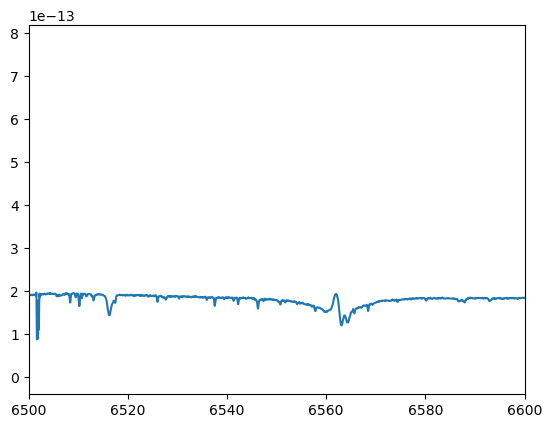

----------------
This graph is: rm177_010323.fits and array 33
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.5986327e-14 5.5804496e-14
 5.5713114e-14]
Spectrum1D (length=192909)
flux:             [ 0.0 erg / (A cm2 s), ..., 5.5713e-14 erg / (A cm2 s) ],  mean=3.8631e-14 erg / (A cm2 s)
spectral axis:    [ 3327.0 Angstrom, ..., 9676.9 Angstrom ],  mean=6501.9 Angstrom


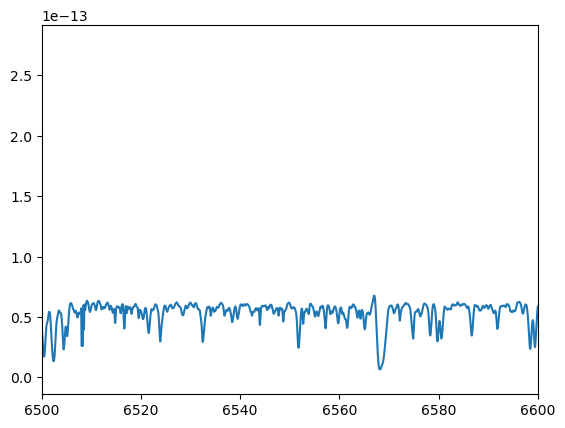

----------------
This graph is: hd269110_122622.fits and array 34
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.3271535e-14 7.3446057e-14
 7.3587803e-14]
Spectrum1D (length=192564)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.3588e-14 erg / (A cm2 s) ],  mean=1.0597e-13 erg / (A cm2 s)
spectral axis:    [ 3323.4 Angstrom, ..., 9669.2 Angstrom ],  mean=6496.3 Angstrom


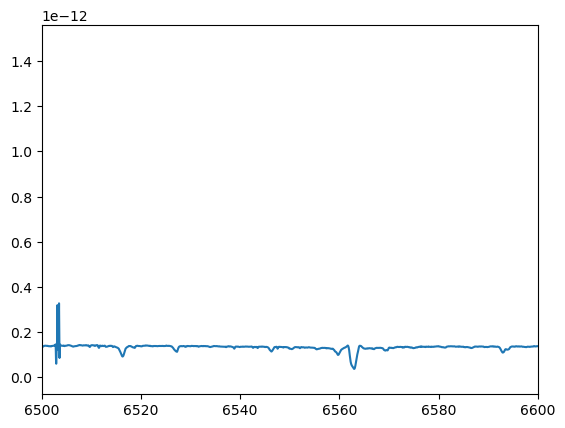

----------------
This graph is: hd269787_122722.fits and array 35
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.0643680e-14 4.1232832e-14
 4.1657382e-14]
Spectrum1D (length=192841)
flux:             [ 0.0 erg / (A cm2 s), ..., 4.1657e-14 erg / (A cm2 s) ],  mean=1.3724e-13 erg / (A cm2 s)
spectral axis:    [ 3323.3 Angstrom, ..., 9666.4 Angstrom ],  mean=6494.9 Angstrom


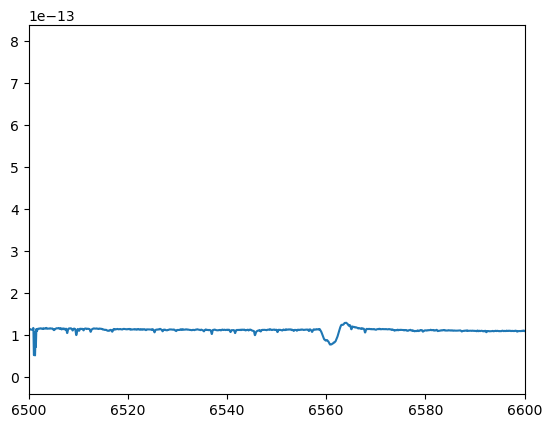

----------------
This graph is: hd269807_122722.fits and array 36
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.6811578e-14 3.7402322e-14
 3.7840194e-14]
Spectrum1D (length=192747)
flux:             [ 0.0 erg / (A cm2 s), ..., 3.784e-14 erg / (A cm2 s) ],  mean=1.0048e-13 erg / (A cm2 s)
spectral axis:    [ 3323.0 Angstrom, ..., 9666.8 Angstrom ],  mean=6494.9 Angstrom


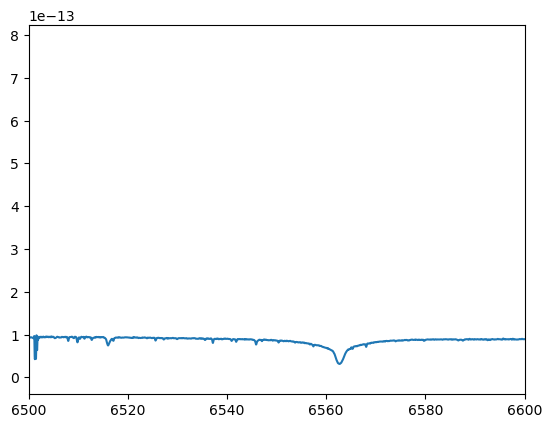

----------------
This graph is: out.fits and array 37
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.5986327e-14 5.5804496e-14
 5.5713114e-14]
Spectrum1D (length=192909)
flux:             [ 0.0 erg / (A cm2 s), ..., 5.5713e-14 erg / (A cm2 s) ],  mean=3.8631e-14 erg / (A cm2 s)
spectral axis:    [ 3327.0 Angstrom, ..., 9676.9 Angstrom ],  mean=6501.9 Angstrom


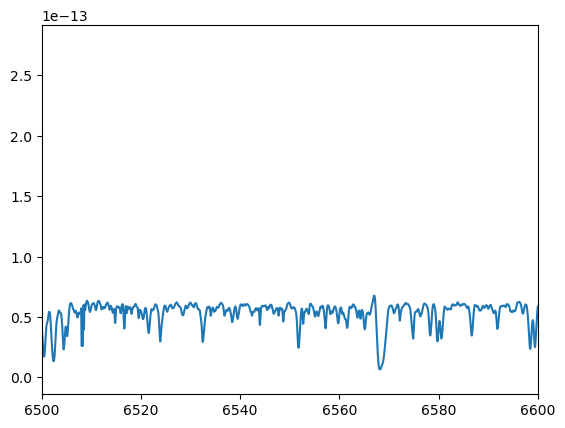

----------------
This graph is: hd268971_122622.fits and array 38
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.5710891e-14 1.5738579e-14
 1.5753034e-14]
Spectrum1D (length=192503)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.5753e-14 erg / (A cm2 s) ],  mean=6.6343e-14 erg / (A cm2 s)
spectral axis:    [ 3323.3 Angstrom, ..., 9669.0 Angstrom ],  mean=6496.2 Angstrom


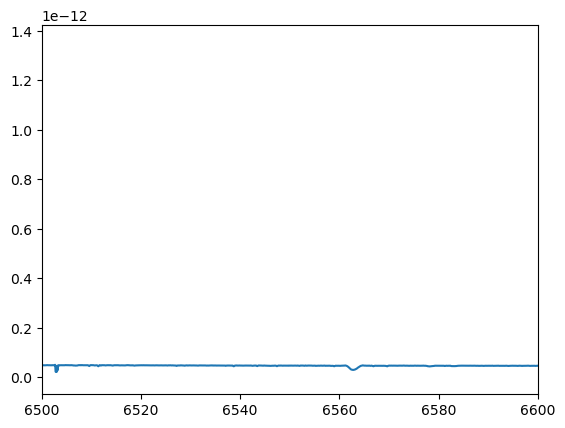

In [162]:
# graph all spectra at the h-alpha line
for i in range(39):
    graph1(i)

# Categorizing the H-alpha line
Looking at each line, we can categorize the graphs into two categories: ones that have emission and ones that don't. The emission line indicates outflowing circumstellar material outside of the line of sight. Generally, stars with an emission line are more rare because they are caused by circumstellar gas being ejected from the star in a stellar wind. Out of all 39 spectra, I found 30 graphs to indicate emission at the Hα line.

## my categories
ones that look like emission line around 6562.8 A:
0, 1, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37

ones that look like absorption:
2, 7, 9, 20, 23, 25, 26, 36, 38

Some need more zoom to determine the category they belong in!
6, 9, 12, 16, 18, 19, 23, 25, 28, 30, 34, 38

In [24]:
# zoom even more into h-alpha
def graph2(i,n,m):
    """
    This takes integer values i, n, m, and 
    outputs the graph corresponding to i in the list from the data.zip file,
    with a wavelength between 6540 and 6580 and with a flux between n and m.
    """
    
    # open the fits file
    hdulist = fits.open(str(files[i]))
    hdr = getheader(files[i])
    
    # read the fits file with specutils
    spec1d = Spectrum1D.read("/Users/kchen/FYPS/"+ files[i])
    filename = '/Users/kchen/FYPS/' + files[i]
    
    # The spectrum is in the first HDU of this file.
    with fits.open(filename) as f:  
        specdata = f[0].data
    
    # clearly divide and label each spectrum
    text = colored('----------------\nThis graph is: ' + files[i] + ' and array ' + str(i), 'red', attrs=['bold'])  
    print(text)  
    print(specdata)
    print(spec1d)
    
    # plot with higher resolution
    ax = plt.subplots(dpi=300)[1] 
    ax.plot(spec1d.spectral_axis, spec1d.flux)
    
    # zooming into h-alpha line
    ax.set_xlim((6540,6580))
    
    # label axes
    ax.set_xlabel('Wavelength [Å]')
    ax.set_ylabel('Flux [erg/s/cm^2/Å]')
    
    # set y limits based on eye based on the plots from graph1()
    ax.set_ylim((n,m))
    
    # show plot
    plt.show()

----------------
This graph is: sk_69_99_122622.fits and array 6
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0501220e-14 1.0465266e-14
 1.0437876e-14]
Spectrum1D (length=192491)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.0438e-14 erg / (A cm2 s) ],  mean=4.2241e-14 erg / (A cm2 s)
spectral axis:    [ 3323.1 Angstrom, ..., 9668.3 Angstrom ],  mean=6495.7 Angstrom


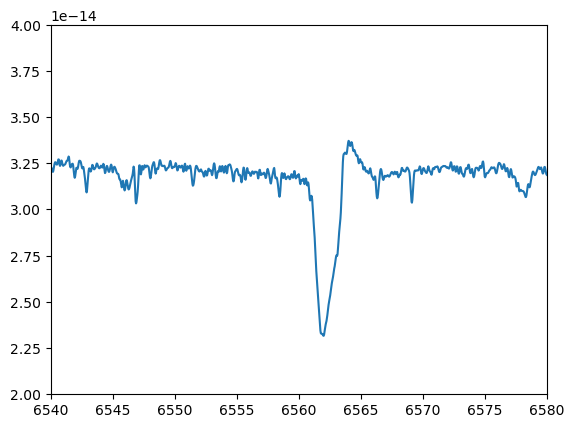

----------------
This graph is: w60_d17_122622.fits and array 9
[9.1347654e-13 0.0000000e+00 0.0000000e+00 ... 7.6088075e-14 7.6335470e-14
 7.6519317e-14]
Spectrum1D (length=192427)
flux:             [ 9.1348e-13 erg / (A cm2 s), ..., 7.6519e-14 erg / (A cm2 s) ],  mean=7.3338e-14 erg / (A cm2 s)
spectral axis:    [ 3322.2 Angstrom, ..., 9666.8 Angstrom ],  mean=6494.5 Angstrom


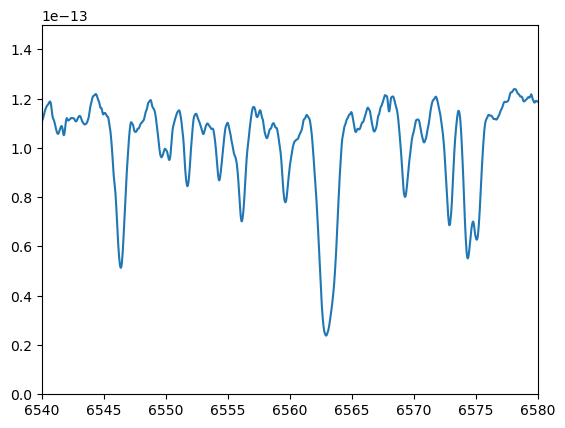

----------------
This graph is: hd268727_010323.fits and array 12
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.7629854e-14 1.7044192e-14
 1.6622263e-14]
Spectrum1D (length=192915)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.6622e-14 erg / (A cm2 s) ],  mean=5.5852e-14 erg / (A cm2 s)
spectral axis:    [ 3323.4 Angstrom, ..., 9666.7 Angstrom ],  mean=6495.1 Angstrom


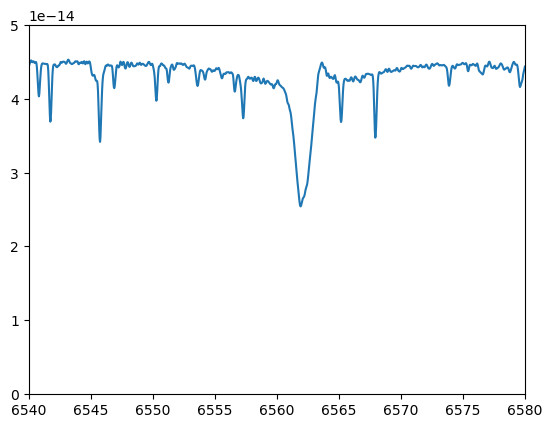

----------------
This graph is: hv2450_122622.fits and array 16
[0.000000e+00 0.000000e+00 0.000000e+00 ... 8.074119e-14 7.933356e-14
 7.845860e-14]
Spectrum1D (length=192226)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.8459e-14 erg / (A cm2 s) ],  mean=4.6086e-14 erg / (A cm2 s)
spectral axis:    [ 3321.8 Angstrom, ..., 9667.6 Angstrom ],  mean=6494.7 Angstrom


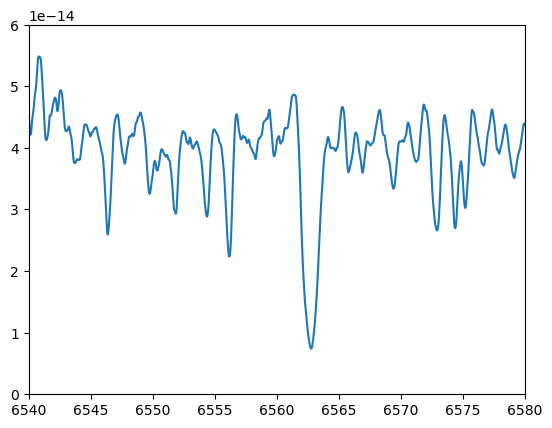

----------------
This graph is: hd269604_122622.fits and array 18
[0.000000e+00 0.000000e+00 0.000000e+00 ... 3.032549e-14 2.935594e-14
 2.865009e-14]
Spectrum1D (length=192272)
flux:             [ 0.0 erg / (A cm2 s), ..., 2.865e-14 erg / (A cm2 s) ],  mean=9.8601e-14 erg / (A cm2 s)
spectral axis:    [ 3322.2 Angstrom, ..., 9668.2 Angstrom ],  mean=6495.2 Angstrom


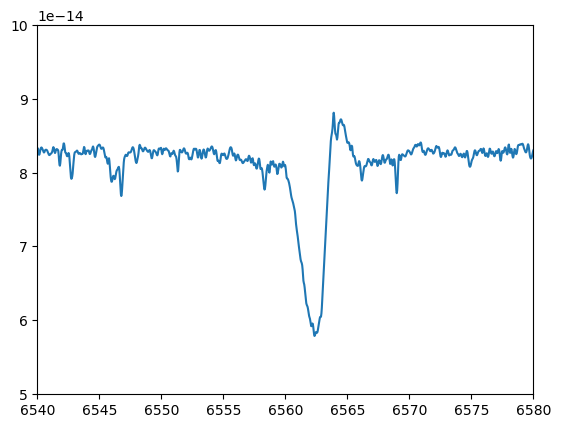

----------------
This graph is: hd268819_122622.fits and array 19
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.12427083e-13
 1.11847712e-13 1.11425544e-13]
Spectrum1D (length=192682)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.1143e-13 erg / (A cm2 s) ],  mean=2.2637e-13 erg / (A cm2 s)
spectral axis:    [ 3323.8 Angstrom, ..., 9668.8 Angstrom ],  mean=6496.3 Angstrom


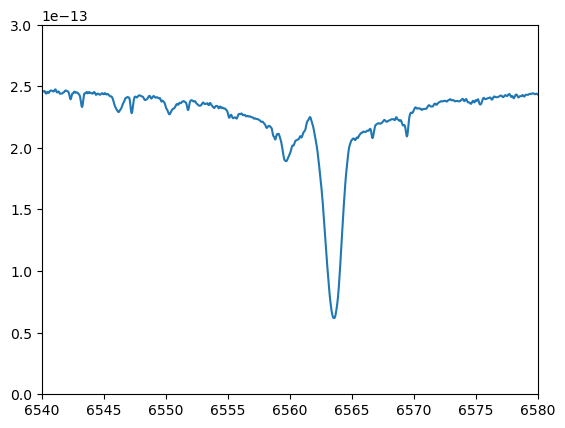

----------------
This graph is: cpd-69-496_122722.fits and array 23
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.2043680e-14 5.1586980e-14
 5.1264833e-14]
Spectrum1D (length=192556)
flux:             [ 0.0 erg / (A cm2 s), ..., 5.1265e-14 erg / (A cm2 s) ],  mean=8.3304e-14 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9668.8 Angstrom ],  mean=6496.0 Angstrom


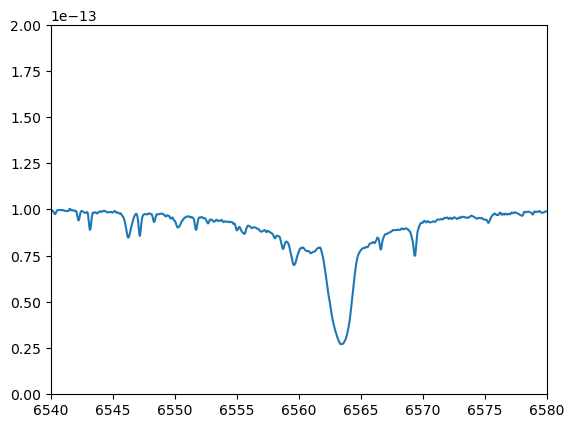

----------------
This graph is: sp77_48_6_122622.fits and array 25
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.6662285e-14 8.6372390e-14
 8.6217010e-14]
Spectrum1D (length=192341)
flux:             [ 0.0 erg / (A cm2 s), ..., 8.6217e-14 erg / (A cm2 s) ],  mean=6.2195e-14 erg / (A cm2 s)
spectral axis:    [ 3322.7 Angstrom, ..., 9669.1 Angstrom ],  mean=6495.9 Angstrom


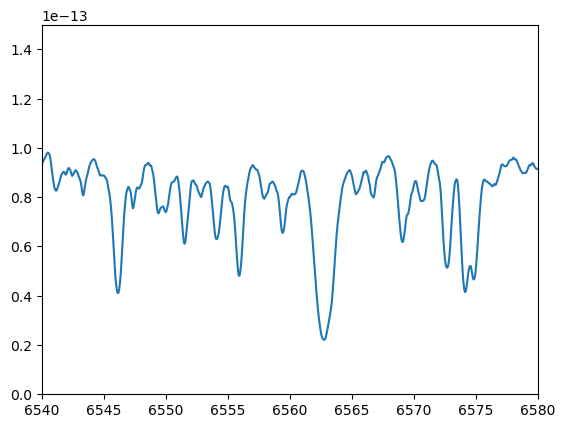

----------------
This graph is: hd269982_122722.fits and array 28
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.0767892e-14 6.1030276e-14
 6.1225832e-14]
Spectrum1D (length=192960)
flux:             [ 0.0 erg / (A cm2 s), ..., 6.1226e-14 erg / (A cm2 s) ],  mean=1.285e-13 erg / (A cm2 s)
spectral axis:    [ 3324.4 Angstrom, ..., 9668.6 Angstrom ],  mean=6496.5 Angstrom


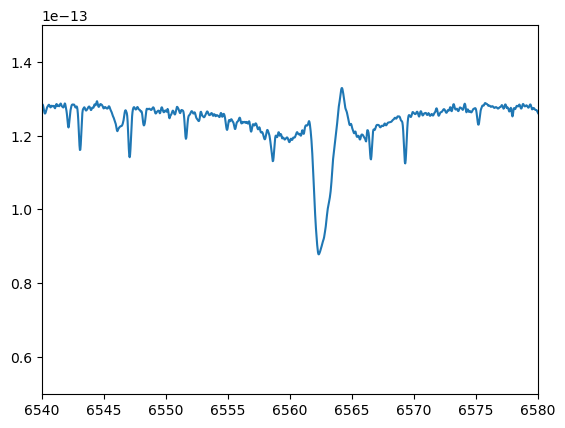

----------------
This graph is: hd268949_010323.fits and array 30
[0.000000e+00 0.000000e+00 0.000000e+00 ... 8.701250e-15 8.342869e-15
 8.094669e-15]
Spectrum1D (length=192691)
flux:             [ 0.0 erg / (A cm2 s), ..., 8.0947e-15 erg / (A cm2 s) ],  mean=3.2044e-14 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9668.6 Angstrom ],  mean=6495.9 Angstrom


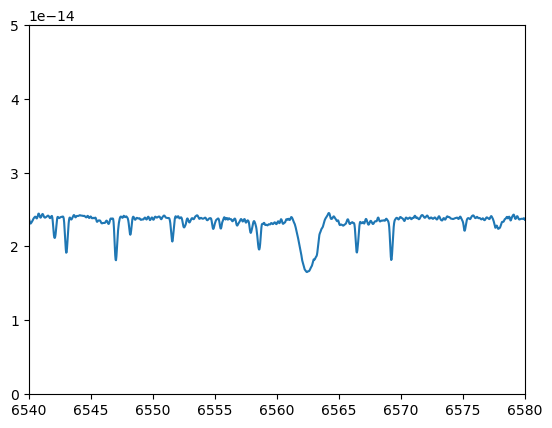

----------------
This graph is: hd269110_122622.fits and array 34
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.3271535e-14 7.3446057e-14
 7.3587803e-14]
Spectrum1D (length=192564)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.3588e-14 erg / (A cm2 s) ],  mean=1.0597e-13 erg / (A cm2 s)
spectral axis:    [ 3323.4 Angstrom, ..., 9669.2 Angstrom ],  mean=6496.3 Angstrom


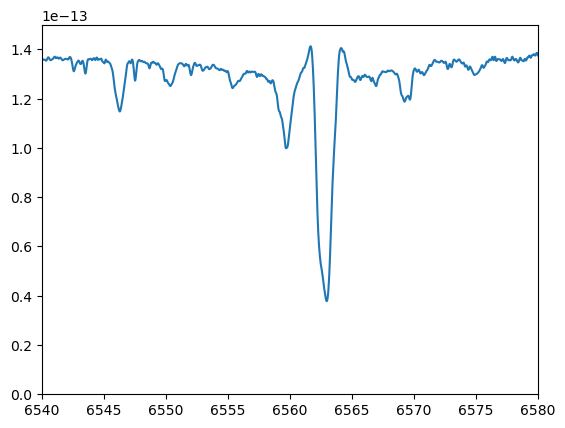

----------------
This graph is: hd268971_122622.fits and array 38
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.5710891e-14 1.5738579e-14
 1.5753034e-14]
Spectrum1D (length=192503)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.5753e-14 erg / (A cm2 s) ],  mean=6.6343e-14 erg / (A cm2 s)
spectral axis:    [ 3323.3 Angstrom, ..., 9669.0 Angstrom ],  mean=6496.2 Angstrom


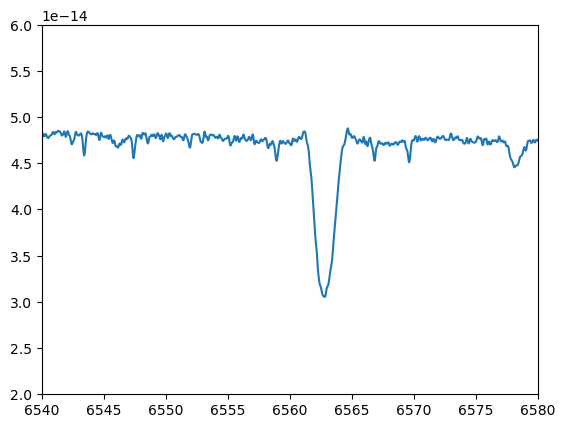

In [164]:
# zooming in on graphs 6, 9, 12, 16, 18, 19, 23, 25, 28, 30, 34, 38
graph2(6, 0.2*10**-13, .4*10**-13)
graph2(9, 0, .15*10**-12)
graph2(12, 0, .5*10**-13)
graph2(16, 0, .06*10**-12)
graph2(18, .05*10**-12, .1*10**-12)
graph2(19, 0, .3*10**-12)
graph2(23, 0, .2*10**-12)
graph2(25, 0, .15*10**-12)
graph2(28, .05*10**-12, .15*10**-12)
graph2(30, 0*10**-12, .05*10**-12)
graph2(34, 0, .15*10**-12)
graph2(38, .02*10**-12, .06*10**-12)

# Categorized
Now we can make functions to tell us automatically if a spectrum has an emission line at 6562.8 Å or only plot ones with/without the emission line.

In [165]:
# function to determine if the graph has emission line at 6562.8 A
emission_list= [0, 1, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37]
def emission(i):
    """
    Takes integer i that corresponds to one of the spectra in data.zip and 
    outputs boolean True/False if it contains an emission line at 6562.8 A
    """
    if i in emission_list:
        return True
    else:
        return False

In [166]:
# iterates all graphs and prints if they do or don't have emission lines
for i in range(39):
    text = colored('This graph is: ' + files[i] + ' and array ' + str(i), 'red', attrs=['bold'])  
    print(text)
    if emission(i)==True:
        print('This contains an emission line')
    else:
        print('This does NOT contain an emission line')


This graph is: hd269879_122722.fits and array 0
This contains an emission line
This graph is: hd269857_122722.fits and array 1
This contains an emission line
This graph is: hd27005_122722.fits and array 2
This does NOT contain an emission line
This graph is: hd269723_122722.fits and array 3
This contains an emission line
This graph is: hd269662_122622.fits and array 4
This contains an emission line
This graph is: hd269070_122622.fits and array 5
This contains an emission line
This graph is: sk_69_99_122622.fits and array 6
This contains an emission line
This graph is: hd269697_122722.fits and array 7
This does NOT contain an emission line
This graph is: hd269902_122722.fits and array 8
This contains an emission line
This graph is: w60_d17_122622.fits and array 9
This does NOT contain an emission line
This graph is: hd269331_122622.fits and array 10
This contains an emission line
This graph is: hd269661_122622.fits and array 11
This contains an emission line
This graph is: hd268727_0103

In [167]:
# prints numbers/names of files that don't have emission lines
for i in range(39):
    if emission(i)==False:
        print(str(i) + ', graph ' + files[i] + ' does not have an emission line')

2, graph hd27005_122722.fits does not have an emission line
7, graph hd269697_122722.fits does not have an emission line
9, graph w60_d17_122622.fits does not have an emission line
20, graph j05344_122722.fits does not have an emission line
23, graph cpd-69-496_122722.fits does not have an emission line
25, graph sp77_48_6_122622.fits does not have an emission line
26, graph hd268828_010323.fits does not have an emission line
36, graph hd269807_122722.fits does not have an emission line
38, graph hd268971_122622.fits does not have an emission line


In [168]:
# function that only plots ones with emission
def graph3(i):
    """
    This takes integer i that corresponds to each graph in the data.zip file and only
    outputs all the graphs from the data.zip file that contain emission lines at 6562.8 A
    with a wavelength between 6540 and 6580.
    """
    
    if emission(i)==True:
        hdulist = fits.open(str(files[i]))
        hdr = getheader(files[i])
        spec1d = Spectrum1D.read("/Users/kchen/FYPS/"+ files[i])
        filename = '/Users/kchen/FYPS/' + files[i]
# The spectrum is in the first HDU of this file.
        with fits.open(filename) as f:  
            specdata = f[0].data
        text = colored('----------------\nThis graph is: ' + files[i] + ' and array ' + str(i), 'red', attrs=['bold'])  
        print(text)  
        print(specdata)
    
        print(spec1d)
    
        ax = plt.subplots()[1] 
        ax.plot(spec1d.spectral_axis, spec1d.flux)
        ax.set_xlim((6540,6580))
        plt.show()


----------------
This graph is: hd269879_122722.fits and array 0
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.6016511e-14 7.2936686e-14
 7.0703419e-14]
Spectrum1D (length=192664)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.0703e-14 erg / (A cm2 s) ],  mean=1.0521e-13 erg / (A cm2 s)
spectral axis:    [ 3322.9 Angstrom, ..., 9667.2 Angstrom ],  mean=6495.0 Angstrom


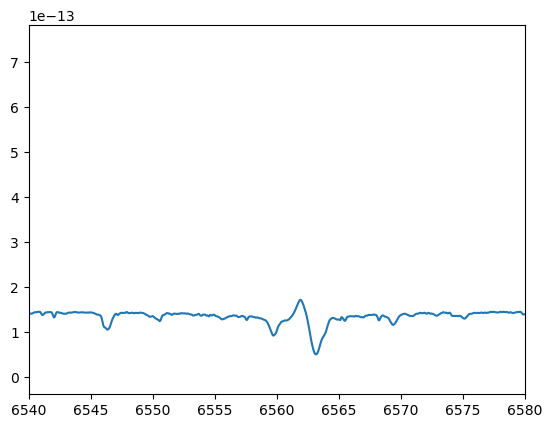

----------------
This graph is: hd269857_122722.fits and array 1
[0.000000e+00 0.000000e+00 0.000000e+00 ... 9.164395e-14 9.208172e-14
 9.241548e-14]
Spectrum1D (length=192788)
flux:             [ 0.0 erg / (A cm2 s), ..., 9.2415e-14 erg / (A cm2 s) ],  mean=1.829e-13 erg / (A cm2 s)
spectral axis:    [ 3323.7 Angstrom, ..., 9668.3 Angstrom ],  mean=6496.0 Angstrom


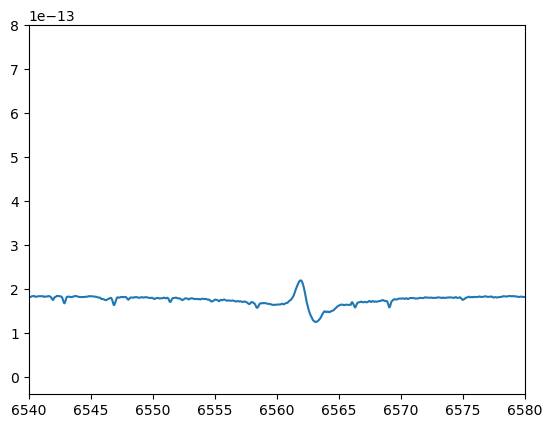

----------------
This graph is: hd269723_122722.fits and array 3
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.4722759e-13 2.4533766e-13
 2.4406060e-13]
Spectrum1D (length=192769)
flux:             [ 0.0 erg / (A cm2 s), ..., 2.4406e-13 erg / (A cm2 s) ],  mean=2.7851e-13 erg / (A cm2 s)
spectral axis:    [ 3322.9 Angstrom, ..., 9666.1 Angstrom ],  mean=6494.5 Angstrom


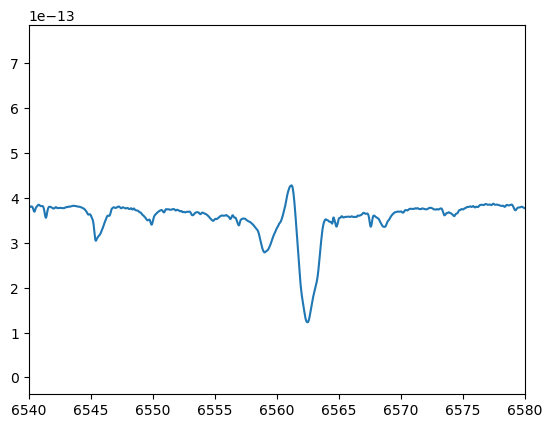

----------------
This graph is: hd269662_122622.fits and array 4
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.2449327e-14 3.2620658e-14
 3.2743390e-14]
Spectrum1D (length=192166)
flux:             [ 0.0 erg / (A cm2 s), ..., 3.2743e-14 erg / (A cm2 s) ],  mean=9.3983e-14 erg / (A cm2 s)
spectral axis:    [ 3322.1 Angstrom, ..., 9668.5 Angstrom ],  mean=6495.3 Angstrom


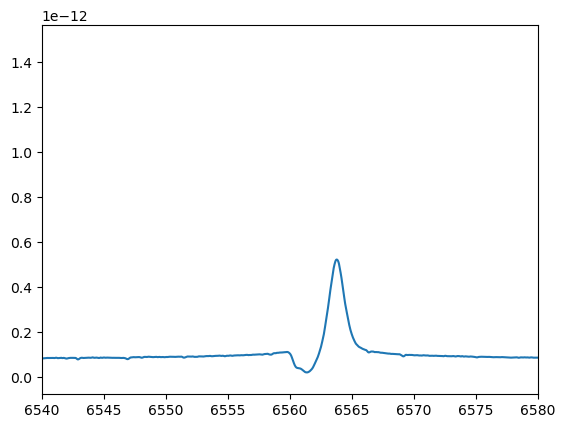

----------------
This graph is: hd269070_122622.fits and array 5
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.1817735e-14 7.1966738e-14
 7.2077903e-14]
Spectrum1D (length=192564)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.2078e-14 erg / (A cm2 s) ],  mean=1.0173e-13 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9668.5 Angstrom ],  mean=6495.8 Angstrom


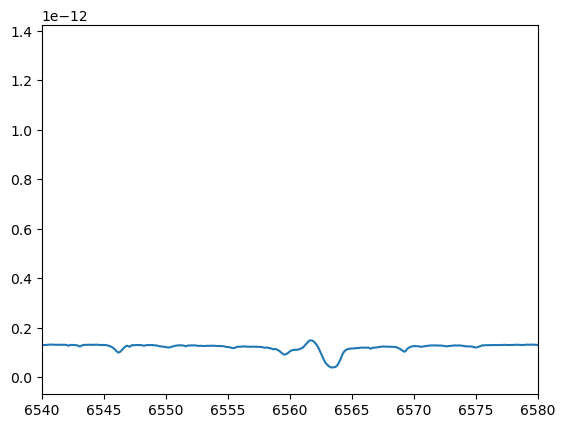

----------------
This graph is: sk_69_99_122622.fits and array 6
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0501220e-14 1.0465266e-14
 1.0437876e-14]
Spectrum1D (length=192491)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.0438e-14 erg / (A cm2 s) ],  mean=4.2241e-14 erg / (A cm2 s)
spectral axis:    [ 3323.1 Angstrom, ..., 9668.3 Angstrom ],  mean=6495.7 Angstrom


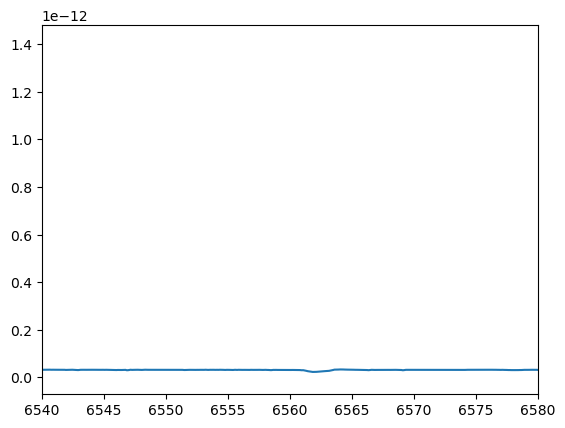

----------------
This graph is: hd269902_122722.fits and array 8
[0.000000e+00 0.000000e+00 0.000000e+00 ... 8.875468e-14 8.878556e-14
 8.879790e-14]
Spectrum1D (length=192749)
flux:             [ 0.0 erg / (A cm2 s), ..., 8.8798e-14 erg / (A cm2 s) ],  mean=1.9705e-13 erg / (A cm2 s)
spectral axis:    [ 3323.7 Angstrom, ..., 9668.2 Angstrom ],  mean=6495.9 Angstrom


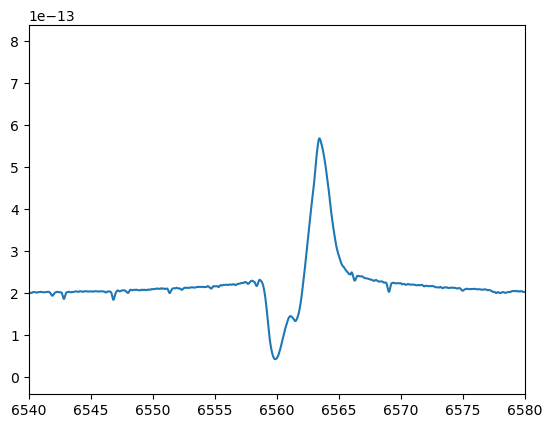

----------------
This graph is: hd269331_122622.fits and array 10
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.4539259e-14 7.2354537e-14
 7.0814285e-14]
Spectrum1D (length=192301)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.0814e-14 erg / (A cm2 s) ],  mean=1.9116e-13 erg / (A cm2 s)
spectral axis:    [ 3322.5 Angstrom, ..., 9668.5 Angstrom ],  mean=6495.5 Angstrom


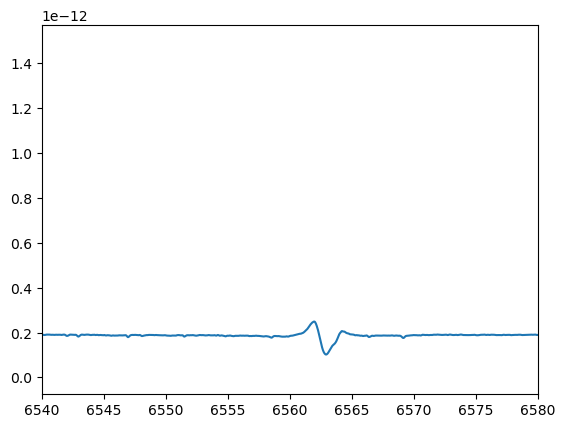

----------------
This graph is: hd269661_122622.fits and array 11
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.2468436e-14 3.2861040e-14
 3.3179422e-14]
Spectrum1D (length=192224)
flux:             [ 0.0 erg / (A cm2 s), ..., 3.3179e-14 erg / (A cm2 s) ],  mean=1.1616e-13 erg / (A cm2 s)
spectral axis:    [ 3322.0 Angstrom, ..., 9668.3 Angstrom ],  mean=6495.2 Angstrom


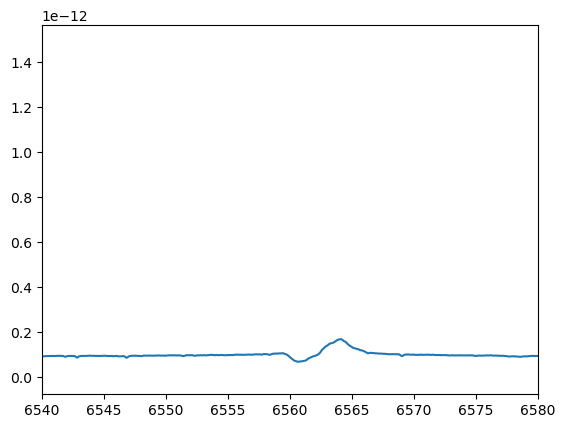

----------------
This graph is: hd268727_010323.fits and array 12
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.7629854e-14 1.7044192e-14
 1.6622263e-14]
Spectrum1D (length=192915)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.6622e-14 erg / (A cm2 s) ],  mean=5.5852e-14 erg / (A cm2 s)
spectral axis:    [ 3323.4 Angstrom, ..., 9666.7 Angstrom ],  mean=6495.1 Angstrom


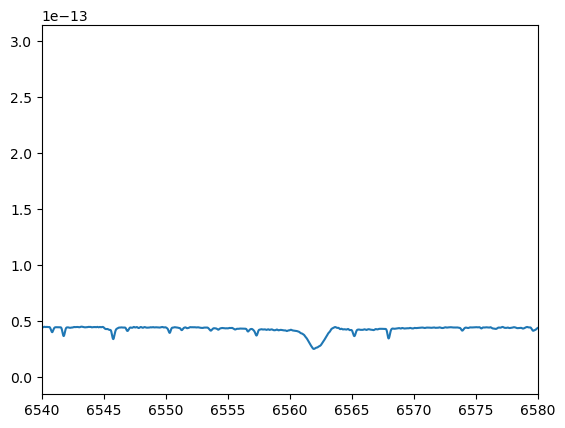

----------------
This graph is: hd269762_122722.fits and array 13
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.6681758e-14 4.6908132e-14
 4.7079155e-14]
Spectrum1D (length=192786)
flux:             [ 0.0 erg / (A cm2 s), ..., 4.7079e-14 erg / (A cm2 s) ],  mean=1.7245e-13 erg / (A cm2 s)
spectral axis:    [ 3323.3 Angstrom, ..., 9667.5 Angstrom ],  mean=6495.4 Angstrom


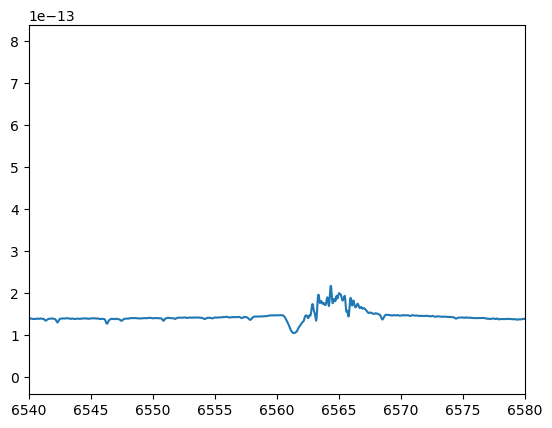

----------------
This graph is: hd269953_122722.fits and array 14
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.4244268e-13 1.4062913e-13
 1.3934113e-13]
Spectrum1D (length=192701)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.3934e-13 erg / (A cm2 s) ],  mean=2.2562e-13 erg / (A cm2 s)
spectral axis:    [ 3323.8 Angstrom, ..., 9668.9 Angstrom ],  mean=6496.4 Angstrom


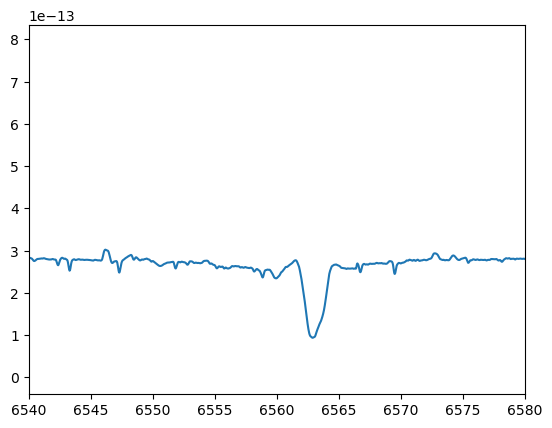

----------------
This graph is: hd33579_122622.fits and array 15
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.7440037e-13 1.7455837e-13
 1.7469159e-13]
Spectrum1D (length=192492)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.7469e-13 erg / (A cm2 s) ],  mean=5.1948e-13 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9668.6 Angstrom ],  mean=6495.9 Angstrom


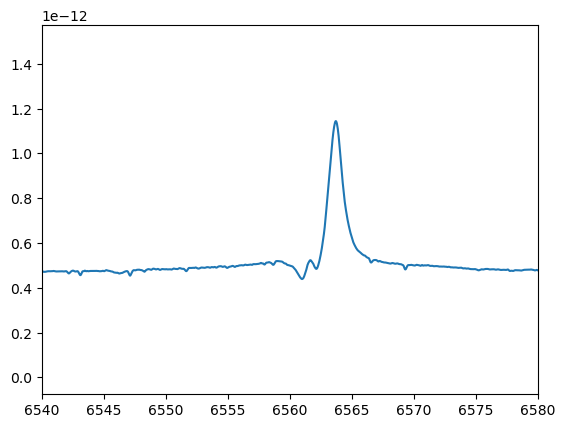

----------------
This graph is: hv2450_122622.fits and array 16
[0.000000e+00 0.000000e+00 0.000000e+00 ... 8.074119e-14 7.933356e-14
 7.845860e-14]
Spectrum1D (length=192226)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.8459e-14 erg / (A cm2 s) ],  mean=4.6086e-14 erg / (A cm2 s)
spectral axis:    [ 3321.8 Angstrom, ..., 9667.6 Angstrom ],  mean=6494.7 Angstrom


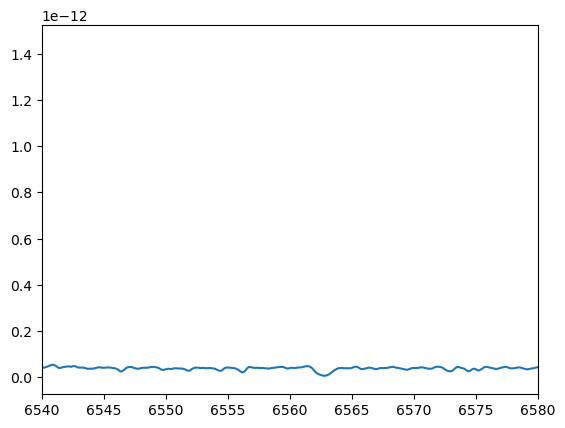

----------------
This graph is: hv883_010323.fits and array 17
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.6294041e-14 2.5897263e-14
 2.5615252e-14]
Spectrum1D (length=192789)
flux:             [ 0.0 erg / (A cm2 s), ..., 2.5615e-14 erg / (A cm2 s) ],  mean=2.2354e-14 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9667.3 Angstrom ],  mean=6495.3 Angstrom


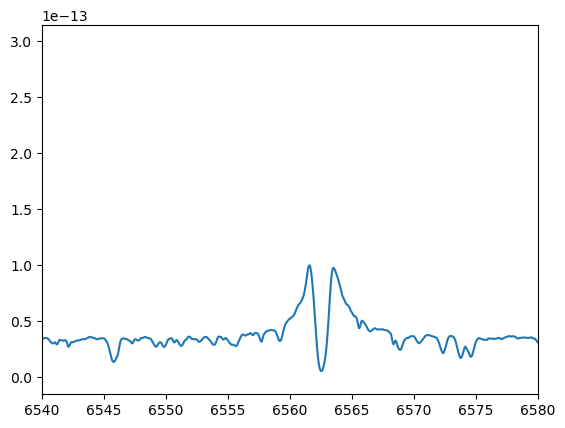

----------------
This graph is: hd269604_122622.fits and array 18
[0.000000e+00 0.000000e+00 0.000000e+00 ... 3.032549e-14 2.935594e-14
 2.865009e-14]
Spectrum1D (length=192272)
flux:             [ 0.0 erg / (A cm2 s), ..., 2.865e-14 erg / (A cm2 s) ],  mean=9.8601e-14 erg / (A cm2 s)
spectral axis:    [ 3322.2 Angstrom, ..., 9668.2 Angstrom ],  mean=6495.2 Angstrom


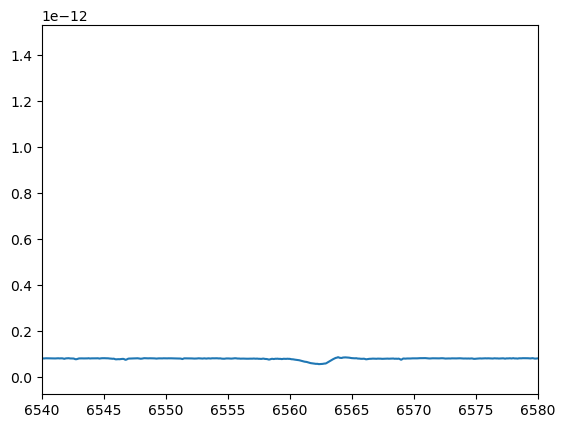

----------------
This graph is: hd268819_122622.fits and array 19
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.12427083e-13
 1.11847712e-13 1.11425544e-13]
Spectrum1D (length=192682)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.1143e-13 erg / (A cm2 s) ],  mean=2.2637e-13 erg / (A cm2 s)
spectral axis:    [ 3323.8 Angstrom, ..., 9668.8 Angstrom ],  mean=6496.3 Angstrom


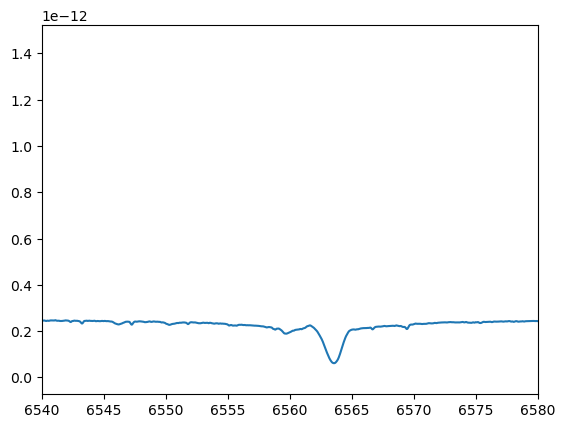

----------------
This graph is: cd_69_310_122622.fits and array 21
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.3274995e-14 4.3502067e-14
 4.3672588e-14]
Spectrum1D (length=192489)
flux:             [ 0.0 erg / (A cm2 s), ..., 4.3673e-14 erg / (A cm2 s) ],  mean=1.0092e-13 erg / (A cm2 s)
spectral axis:    [ 3322.9 Angstrom, ..., 9668.4 Angstrom ],  mean=6495.7 Angstrom


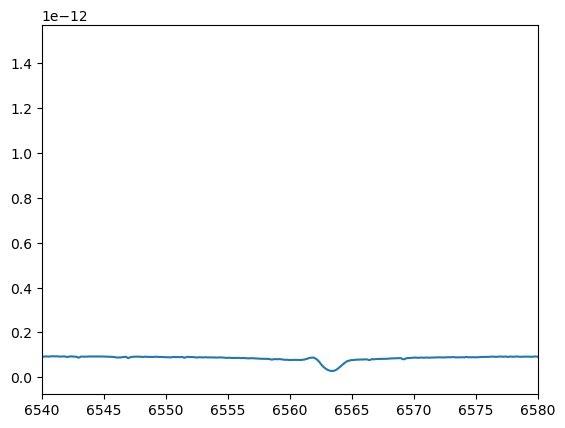

----------------
This graph is: sp77_31_16_122622.fits and array 22
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.7176158e-13 1.7136046e-13
 1.7108399e-13]
Spectrum1D (length=192682)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.7108e-13 erg / (A cm2 s) ],  mean=1.3103e-13 erg / (A cm2 s)
spectral axis:    [ 3323.8 Angstrom, ..., 9668.8 Angstrom ],  mean=6496.3 Angstrom


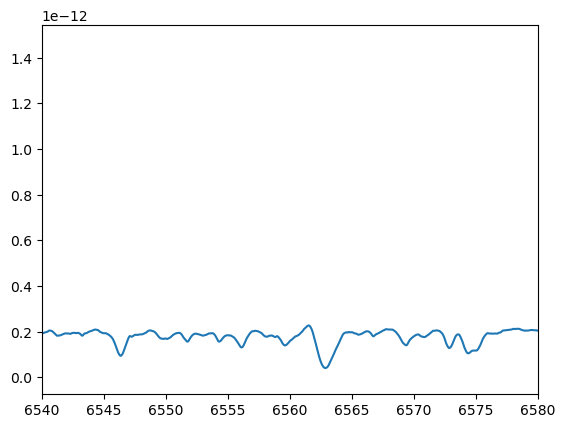

----------------
This graph is: hd268687_122622.fits and array 24
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.0974283e-14 6.0578218e-14
 6.0283294e-14]
Spectrum1D (length=192666)
flux:             [ 0.0 erg / (A cm2 s), ..., 6.0283e-14 erg / (A cm2 s) ],  mean=1.1449e-13 erg / (A cm2 s)
spectral axis:    [ 3323.7 Angstrom, ..., 9668.8 Angstrom ],  mean=6496.3 Angstrom


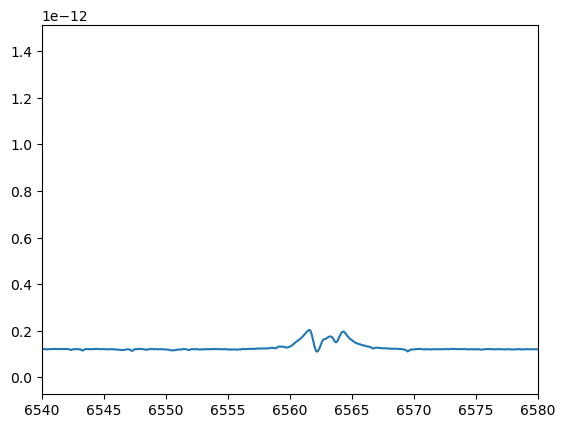

----------------
This graph is: hd269651_122622.fits and array 27
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.5919357e-14 2.6044738e-14
 2.6144876e-14]
Spectrum1D (length=192392)
flux:             [ 0.0 erg / (A cm2 s), ..., 2.6145e-14 erg / (A cm2 s) ],  mean=7.4752e-14 erg / (A cm2 s)
spectral axis:    [ 3322.6 Angstrom, ..., 9668.4 Angstrom ],  mean=6495.5 Angstrom


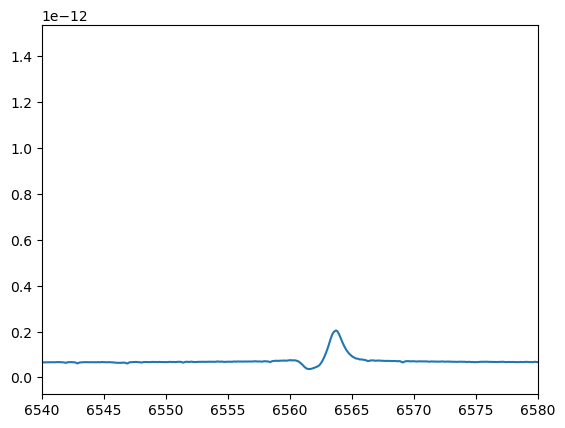

----------------
This graph is: hd269982_122722.fits and array 28
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.0767892e-14 6.1030276e-14
 6.1225832e-14]
Spectrum1D (length=192960)
flux:             [ 0.0 erg / (A cm2 s), ..., 6.1226e-14 erg / (A cm2 s) ],  mean=1.285e-13 erg / (A cm2 s)
spectral axis:    [ 3324.4 Angstrom, ..., 9668.6 Angstrom ],  mean=6496.5 Angstrom


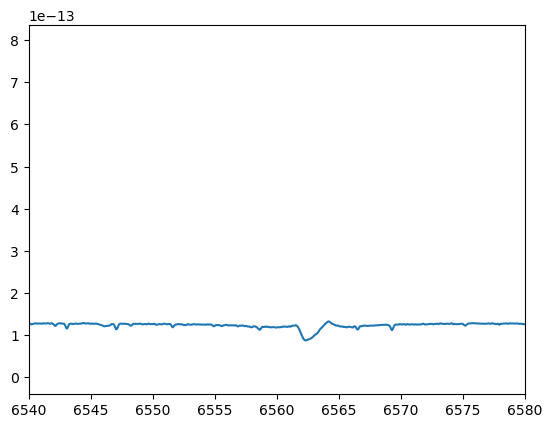

----------------
This graph is: sk_69_148_122622.fits and array 29
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.3818732e-14 7.3229718e-14
 7.2789546e-14]
Spectrum1D (length=192561)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.279e-14 erg / (A cm2 s) ],  mean=8.1735e-14 erg / (A cm2 s)
spectral axis:    [ 3323.1 Angstrom, ..., 9668.0 Angstrom ],  mean=6495.6 Angstrom


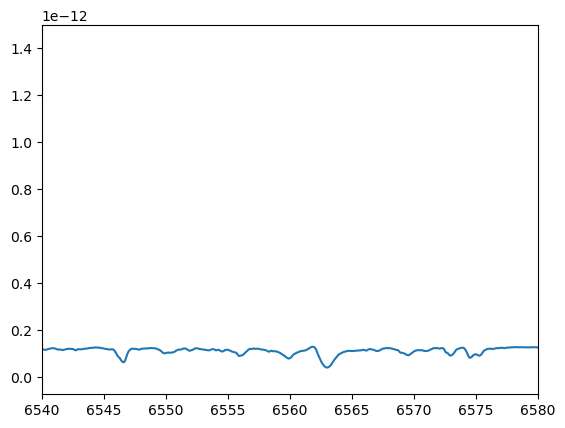

----------------
This graph is: hd268949_010323.fits and array 30
[0.000000e+00 0.000000e+00 0.000000e+00 ... 8.701250e-15 8.342869e-15
 8.094669e-15]
Spectrum1D (length=192691)
flux:             [ 0.0 erg / (A cm2 s), ..., 8.0947e-15 erg / (A cm2 s) ],  mean=3.2044e-14 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9668.6 Angstrom ],  mean=6495.9 Angstrom


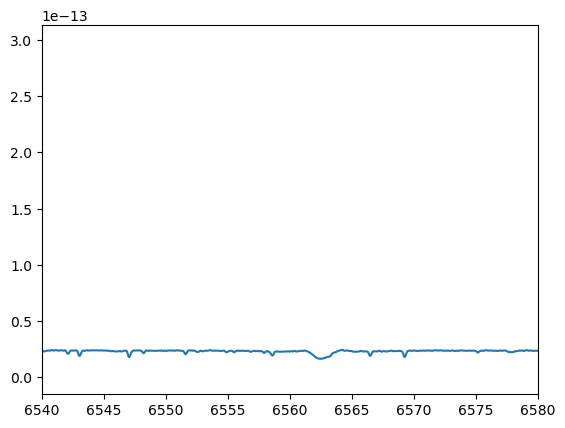

----------------
This graph is: hd268946_122622.fits and array 31
[0.000000e+00 0.000000e+00 0.000000e+00 ... 5.743614e-14 5.788091e-14
 5.820490e-14]
Spectrum1D (length=192551)
flux:             [ 0.0 erg / (A cm2 s), ..., 5.8205e-14 erg / (A cm2 s) ],  mean=2.1416e-13 erg / (A cm2 s)
spectral axis:    [ 3322.7 Angstrom, ..., 9666.8 Angstrom ],  mean=6494.8 Angstrom


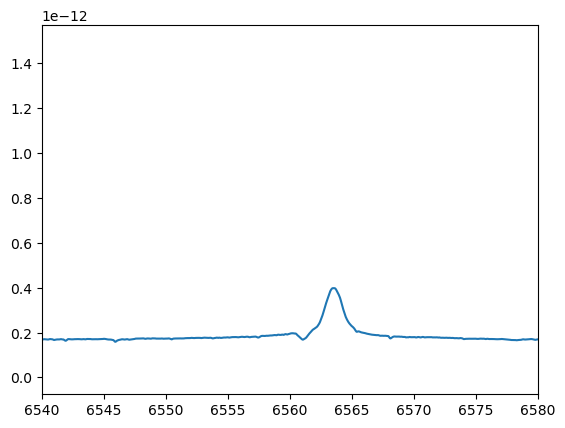

----------------
This graph is: hd269840_122722.fits and array 32
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.6524778e-14 9.7689170e-14
 9.8606826e-14]
Spectrum1D (length=193164)
flux:             [ 0.0 erg / (A cm2 s), ..., 9.8607e-14 erg / (A cm2 s) ],  mean=1.7566e-13 erg / (A cm2 s)
spectral axis:    [ 3324.5 Angstrom, ..., 9667.4 Angstrom ],  mean=6495.9 Angstrom


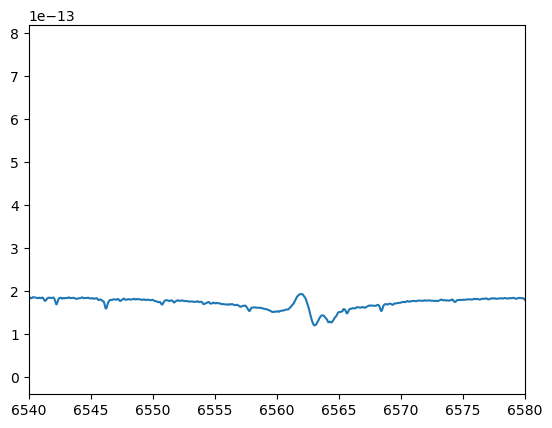

----------------
This graph is: rm177_010323.fits and array 33
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.5986327e-14 5.5804496e-14
 5.5713114e-14]
Spectrum1D (length=192909)
flux:             [ 0.0 erg / (A cm2 s), ..., 5.5713e-14 erg / (A cm2 s) ],  mean=3.8631e-14 erg / (A cm2 s)
spectral axis:    [ 3327.0 Angstrom, ..., 9676.9 Angstrom ],  mean=6501.9 Angstrom


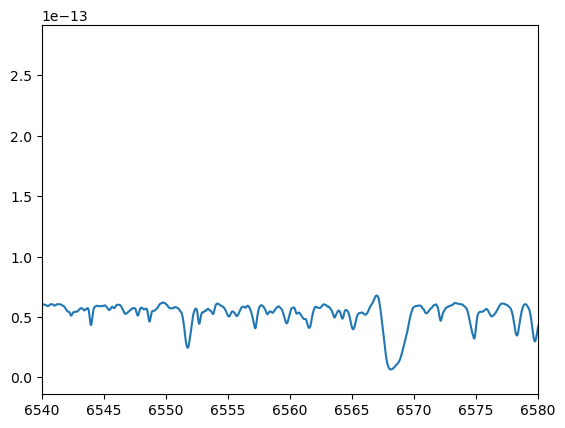

----------------
This graph is: hd269110_122622.fits and array 34
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.3271535e-14 7.3446057e-14
 7.3587803e-14]
Spectrum1D (length=192564)
flux:             [ 0.0 erg / (A cm2 s), ..., 7.3588e-14 erg / (A cm2 s) ],  mean=1.0597e-13 erg / (A cm2 s)
spectral axis:    [ 3323.4 Angstrom, ..., 9669.2 Angstrom ],  mean=6496.3 Angstrom


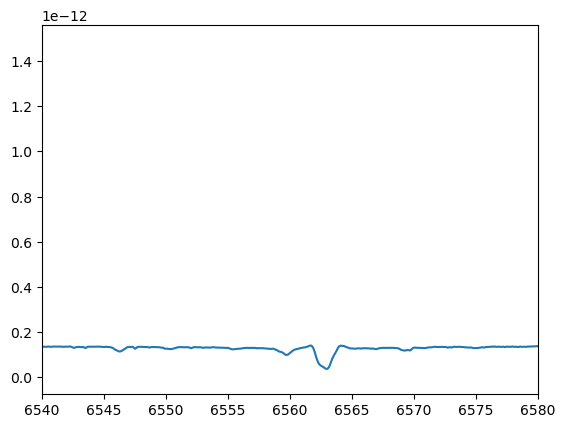

----------------
This graph is: hd269787_122722.fits and array 35
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.0643680e-14 4.1232832e-14
 4.1657382e-14]
Spectrum1D (length=192841)
flux:             [ 0.0 erg / (A cm2 s), ..., 4.1657e-14 erg / (A cm2 s) ],  mean=1.3724e-13 erg / (A cm2 s)
spectral axis:    [ 3323.3 Angstrom, ..., 9666.4 Angstrom ],  mean=6494.9 Angstrom


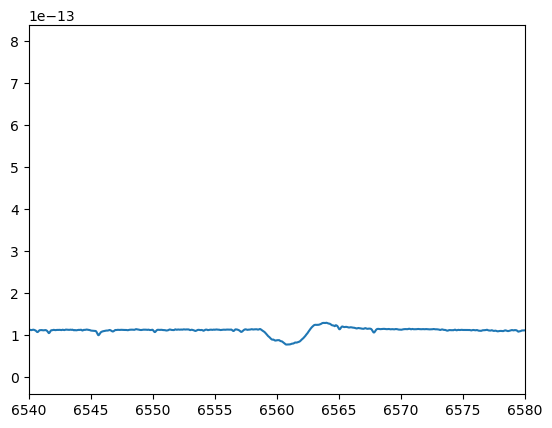

----------------
This graph is: out.fits and array 37
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.5986327e-14 5.5804496e-14
 5.5713114e-14]
Spectrum1D (length=192909)
flux:             [ 0.0 erg / (A cm2 s), ..., 5.5713e-14 erg / (A cm2 s) ],  mean=3.8631e-14 erg / (A cm2 s)
spectral axis:    [ 3327.0 Angstrom, ..., 9676.9 Angstrom ],  mean=6501.9 Angstrom


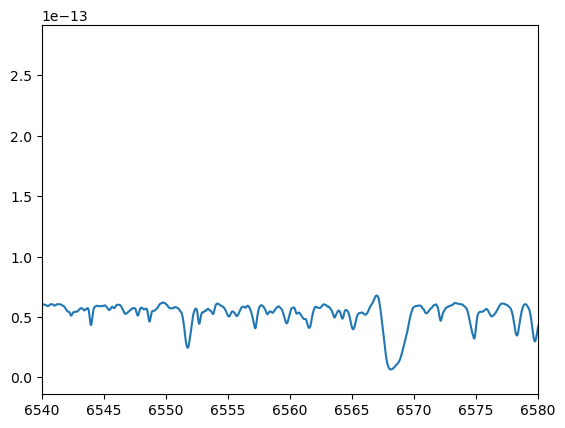

In [169]:
# plots all graphs with emission lines
for i in range(39):
    graph3(i)

In [170]:
# function that only plots ones with NO emission lines
def graph4(i):
    """
    This takes integer i that corresponds to each graph in the data.zip file and only
    outputs all the graphs from the data.zip file that DO NOT contain emission lines at 6562.8 A
    with a wavelength between 6540 and 6580.
    """
    
    if emission(i)==False:
        hdulist = fits.open(str(files[i]))
        hdr = getheader(files[i])
        spec1d = Spectrum1D.read("/Users/kchen/FYPS/"+ files[i])
        filename = '/Users/kchen/FYPS/' + files[i]
# The spectrum is in the first HDU of this file.
        with fits.open(filename) as f:  
            specdata = f[0].data
        text = colored('----------------\nThis graph is: ' + files[i] + ' and array ' + str(i), 'red', attrs=['bold'])  
        print(text)  
        print(specdata)
    
        print(spec1d)
    
        ax = plt.subplots()[1] 
        ax.plot(spec1d.spectral_axis, spec1d.flux)
        ax.set_xlim((6540,6580))
        plt.show()


----------------
This graph is: hd27005_122722.fits and array 2
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.7671827e-14 4.8088954e-14
 4.8385954e-14]
Spectrum1D (length=192682)
flux:             [ 0.0 erg / (A cm2 s), ..., 4.8386e-14 erg / (A cm2 s) ],  mean=1.0345e-13 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9666.9 Angstrom ],  mean=6495.0 Angstrom


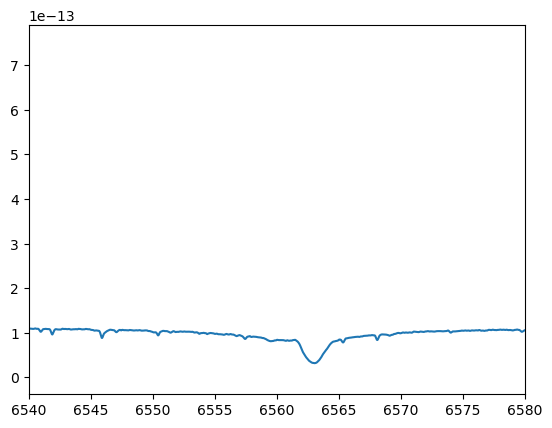

----------------
This graph is: hd269697_122722.fits and array 7
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.12180529e-13
 1.12222975e-13 1.12242159e-13]
Spectrum1D (length=192734)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.1224e-13 erg / (A cm2 s) ],  mean=2.2244e-13 erg / (A cm2 s)
spectral axis:    [ 3323.1 Angstrom, ..., 9666.9 Angstrom ],  mean=6495.0 Angstrom


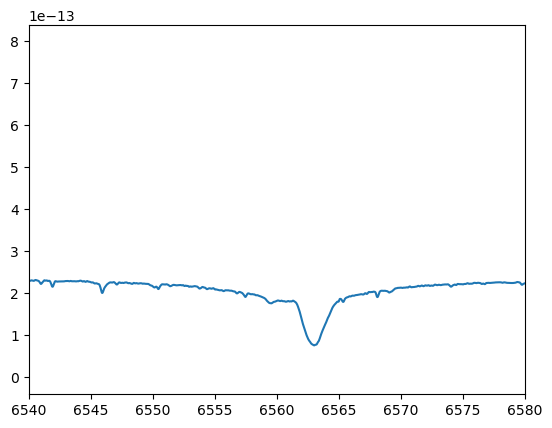

----------------
This graph is: w60_d17_122622.fits and array 9
[9.1347654e-13 0.0000000e+00 0.0000000e+00 ... 7.6088075e-14 7.6335470e-14
 7.6519317e-14]
Spectrum1D (length=192427)
flux:             [ 9.1348e-13 erg / (A cm2 s), ..., 7.6519e-14 erg / (A cm2 s) ],  mean=7.3338e-14 erg / (A cm2 s)
spectral axis:    [ 3322.2 Angstrom, ..., 9666.8 Angstrom ],  mean=6494.5 Angstrom


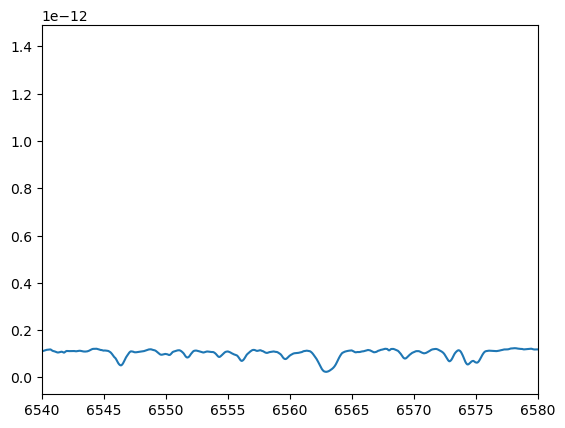

----------------
This graph is: j05344_122722.fits and array 20
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.3717877e-14 6.3812914e-14
 6.3889452e-14]
Spectrum1D (length=192899)
flux:             [ 0.0 erg / (A cm2 s), ..., 6.3889e-14 erg / (A cm2 s) ],  mean=5.2784e-14 erg / (A cm2 s)
spectral axis:    [ 3323.7 Angstrom, ..., 9666.8 Angstrom ],  mean=6495.2 Angstrom


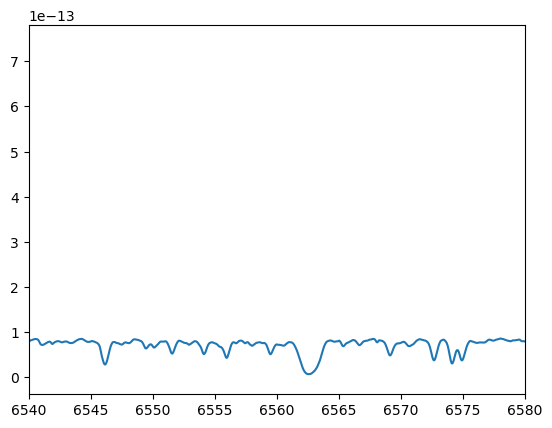

----------------
This graph is: cpd-69-496_122722.fits and array 23
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.2043680e-14 5.1586980e-14
 5.1264833e-14]
Spectrum1D (length=192556)
flux:             [ 0.0 erg / (A cm2 s), ..., 5.1265e-14 erg / (A cm2 s) ],  mean=8.3304e-14 erg / (A cm2 s)
spectral axis:    [ 3323.2 Angstrom, ..., 9668.8 Angstrom ],  mean=6496.0 Angstrom


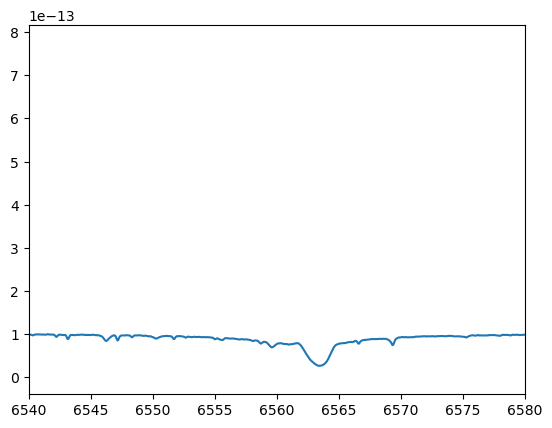

----------------
This graph is: sp77_48_6_122622.fits and array 25
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.6662285e-14 8.6372390e-14
 8.6217010e-14]
Spectrum1D (length=192341)
flux:             [ 0.0 erg / (A cm2 s), ..., 8.6217e-14 erg / (A cm2 s) ],  mean=6.2195e-14 erg / (A cm2 s)
spectral axis:    [ 3322.7 Angstrom, ..., 9669.1 Angstrom ],  mean=6495.9 Angstrom


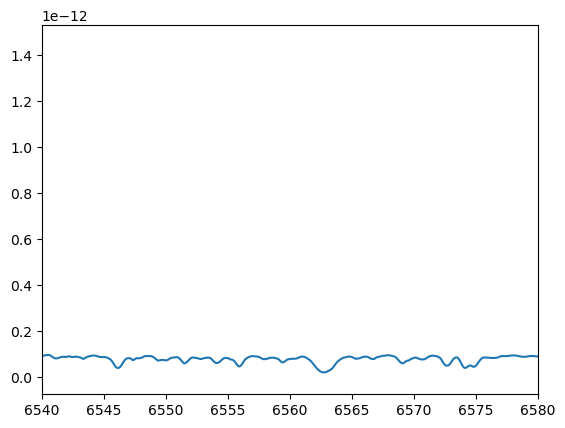

----------------
This graph is: hd268828_010323.fits and array 26
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.1596152e-14 3.1435199e-14
 3.1324695e-14]
Spectrum1D (length=193166)
flux:             [ 0.0 erg / (A cm2 s), ..., 3.1325e-14 erg / (A cm2 s) ],  mean=3.9852e-14 erg / (A cm2 s)
spectral axis:    [ 3325.0 Angstrom, ..., 9668.7 Angstrom ],  mean=6496.9 Angstrom


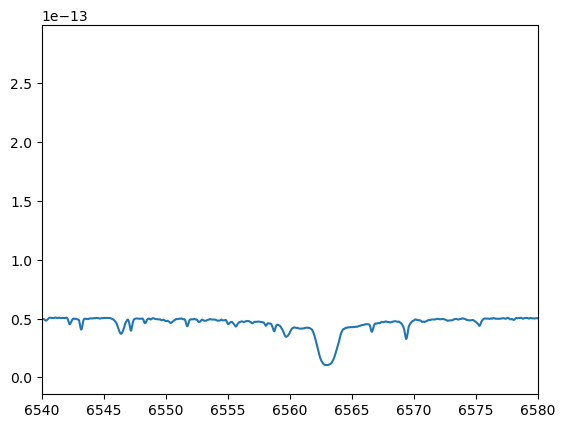

----------------
This graph is: hd269807_122722.fits and array 36
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.6811578e-14 3.7402322e-14
 3.7840194e-14]
Spectrum1D (length=192747)
flux:             [ 0.0 erg / (A cm2 s), ..., 3.784e-14 erg / (A cm2 s) ],  mean=1.0048e-13 erg / (A cm2 s)
spectral axis:    [ 3323.0 Angstrom, ..., 9666.8 Angstrom ],  mean=6494.9 Angstrom


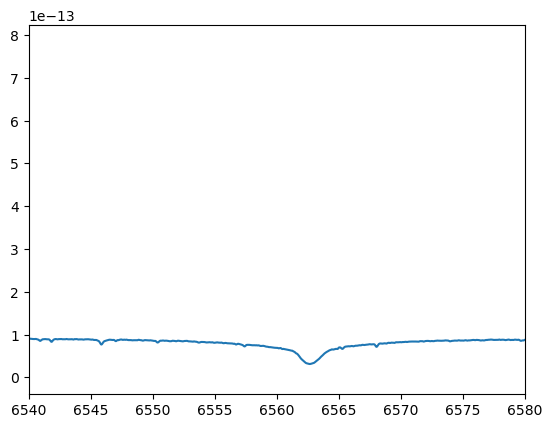

----------------
This graph is: hd268971_122622.fits and array 38
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.5710891e-14 1.5738579e-14
 1.5753034e-14]
Spectrum1D (length=192503)
flux:             [ 0.0 erg / (A cm2 s), ..., 1.5753e-14 erg / (A cm2 s) ],  mean=6.6343e-14 erg / (A cm2 s)
spectral axis:    [ 3323.3 Angstrom, ..., 9669.0 Angstrom ],  mean=6496.2 Angstrom


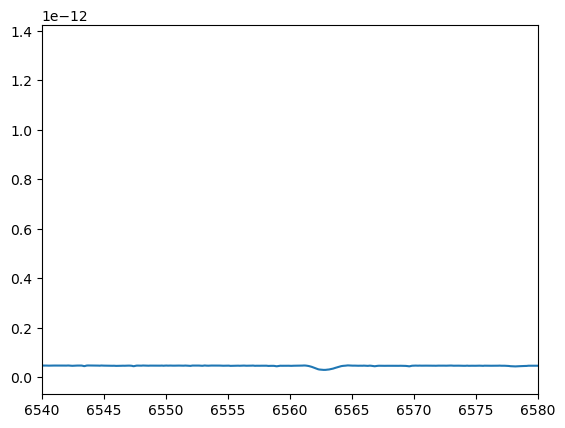

In [171]:
# plot all those with no emission lines
for i in range(39):
    graph4(i)

----------------
This graph is: hd269762_122722.fits and array 13
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.6681758e-14 4.6908132e-14
 4.7079155e-14]
Spectrum1D (length=192786)
flux:             [ 0.0 erg / (A cm2 s), ..., 4.7079e-14 erg / (A cm2 s) ],  mean=1.7245e-13 erg / (A cm2 s)
spectral axis:    [ 3323.3 Angstrom, ..., 9667.5 Angstrom ],  mean=6495.4 Angstrom


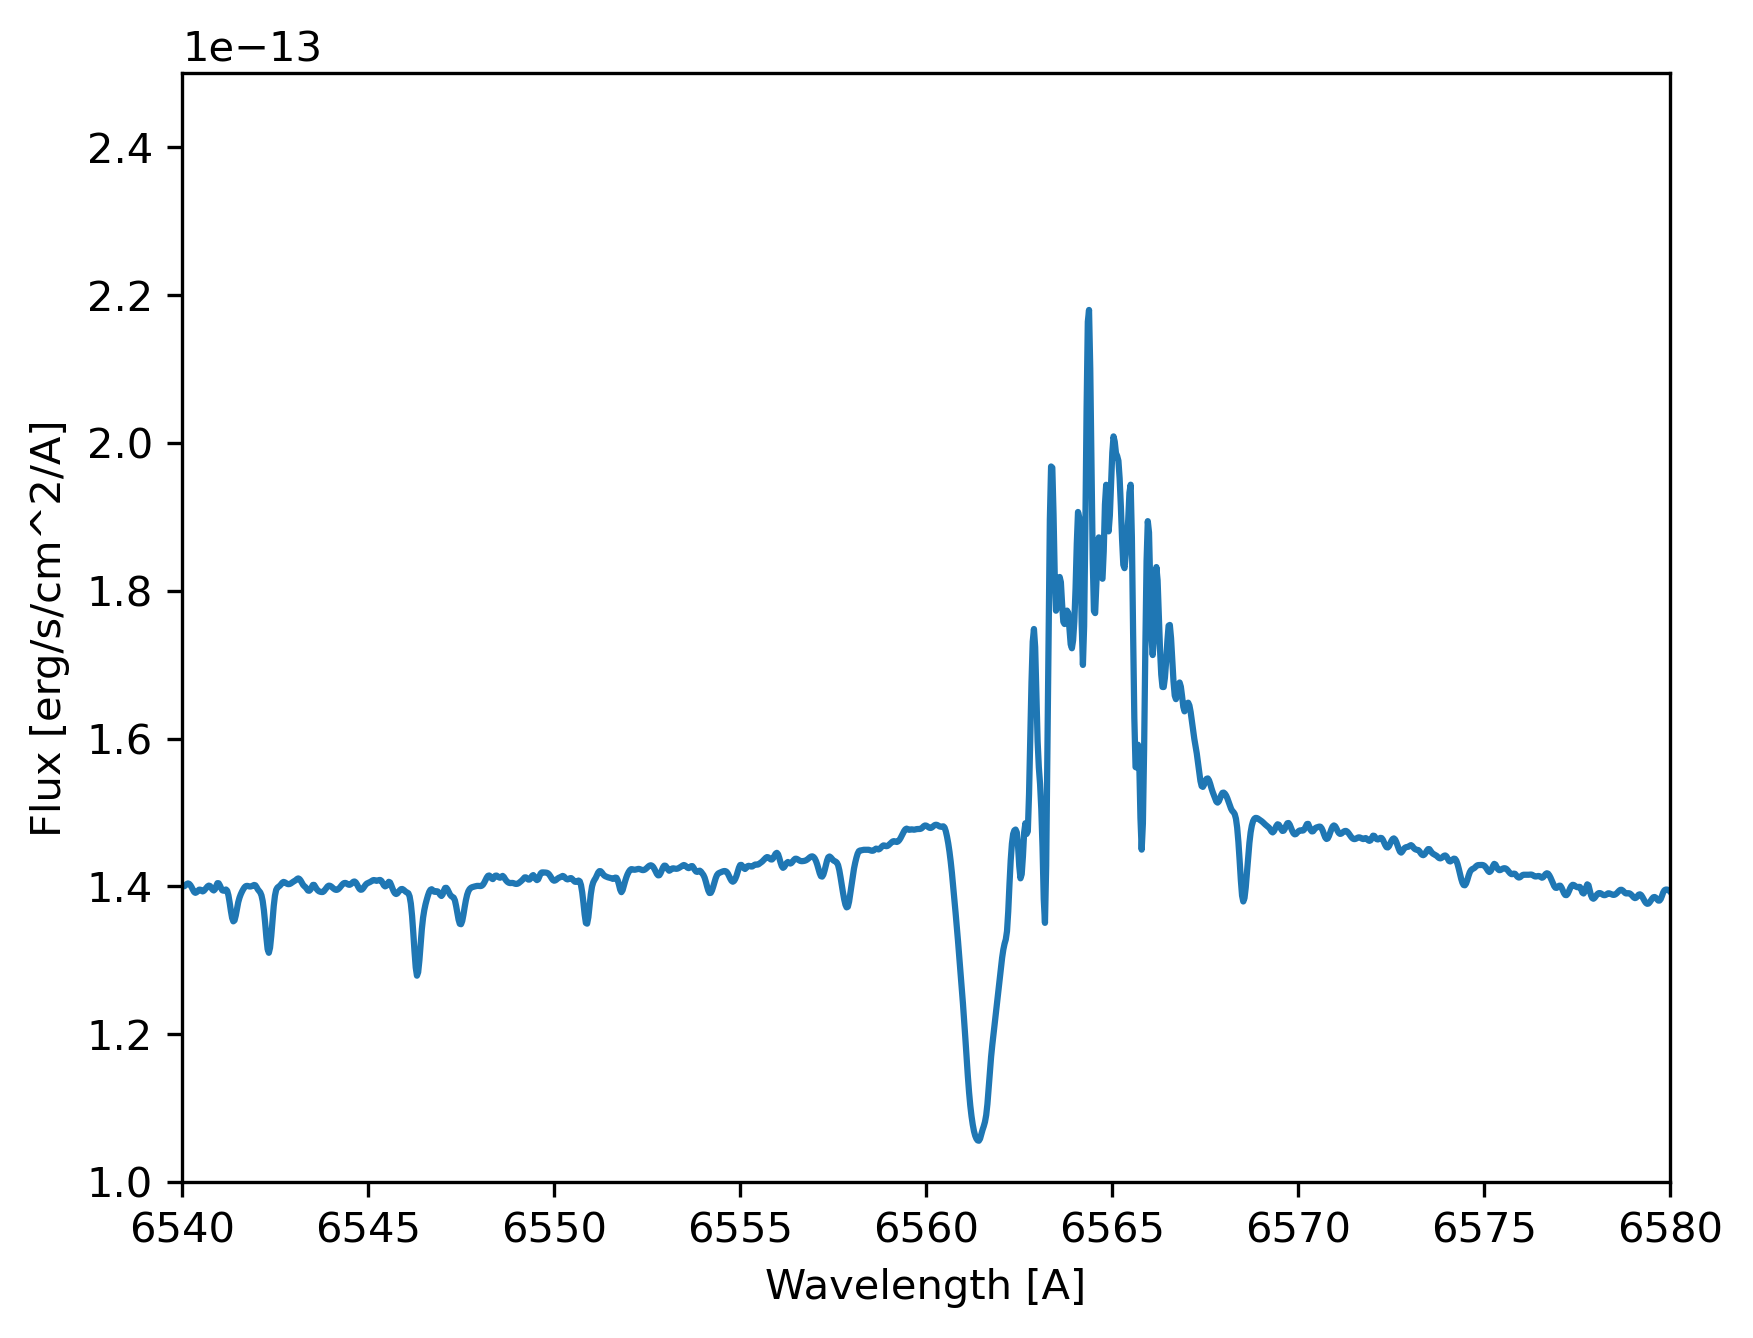

In [26]:
graph2(13, 1e-13, 2.5e-13)